# Final Project Submission

Please fill out:
* Student name: Maria Kuzmin
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL: tbd


# Don't Roam Buy a Home

The real estate startup “Don’t Roam Buy a Home” (DRBH for short) has contacted us as they are trying to create an app targeted at those who do not feel like they can compete in the current brutal real estate market. DRBH’s application is meant for the normal average person that does not have much knowledge about the real estate market but is trying to understand what would be the best investment given their resources and their needs.

In our business case, DRBH has hired us in order to assist with analyzing raw real estate data and breaking down the trends of the housing market in King County. Their end product centers around having users enter the desired number of bedrooms, bathrooms, the overall residence’s square feet or lot size as well as neighborhood, budget in terms of savings and possible monthly mortgage. With this information the app will provide the user key information to help make the most educated choice and have the most profitable investment with the available funds.

Don't Roam Buy a Home will help users answer some questions like: 
- what is the best neighborhood for me to look into buying a house, given my budget and monthly salary?
- Can I afford an extra bedroom/bathroom or should I save up and add one later on?
- Would it be better to buy a new property or an old run down one and use the extra money to renovate?
- Is this a a good time to buy, given my budget and my salary, or is it better to wait to purchase a house, saving up my monthly salary for a bigger down payment?

These and more are the information that we will be able to provide to the users of the app, starting from our analysis of the King's County Housing Market.

# How are we going to get there

Here is a roadmap of the steps that we are going to take:
* Data Preparation:
    * [Looking at Data](#Data)
    * [Cleaning Data](#Clean_the_Data)
    * [Preparing data: One Hot Encoding](#OHE)
* [Linear Regression Model with OHE](#OHELRM)
* [Trying to improve our model:](#impr)
    * [Removing Outliers](#Out)
    * [Transformations](#Trans)
    * [Scaling: Min Max and Normal Scaling](#scal)
* [Linear Regression with MinMax Scaling](#MMLRM)
* [Linear Regression with Normal Scaling](#NLRM)
* [Checking for Multicollinearity](#Multi)
* [P-value and F-Statistic](#PF)
* [Linear Regression Model F-statistic](#PFLRM)
* [Feature Engineering:](#FE)
    * [Renovations](#Reno)
    * [Zipcode](#Zip)
    * [Seasons](#Seas)
* Polynomial Regression


### Imports

Let's import all the libraries that we are going to need for our analysis.

In [131]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss # these last 3 for cool graphs, not essential
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from sklearn.preprocessing import LabelBinarizer
from colorama import Fore
from colorama import Style

%matplotlib inline
plt.style.use('seaborn-notebook')

# The Data <a id='Data'></a>

This project uses the King County House Sales dataset, which can be found in `kc_house_data.csv`. 
Here is a brief description of the meaning of each column:


### **Column Names and Descriptions for King County Data Set**

- `id` - Unique identifier for a house
- `date` - Date house was sold
- `price` - Sale price (prediction target)
- `bedrooms` - Number of bedrooms
- `bathrooms` - Number of bathrooms
- `sqft_living` - Square footage of living space in the home
- `sqft_lot` - Square footage of the lot
- `floors` - Number of floors (levels) in house
- `waterfront` - Whether the house is on a waterfront
    - Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
- `view` - Quality of view from house
    - Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
- `condition` - How good the overall condition of the house is. Related to maintenance of house.
    - See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
- `grade` - Overall grade of the house. Related to the construction and design of the house.
    - See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
- `sqft_above` - Square footage of house apart from basement
- `sqft_basement` - Square footage of the basement
- `yr_built` - Year when house was built
- `yr_renovated` - Year when house was renovated
- `zipcode` - ZIP Code used by the United States Postal Service
- `lat` - Latitude coordinate
- `long` - Longitude coordinate
- `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
- `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

Let us proceed by loading the data and taking a look.

In [2]:
df=pd.read_csv('Data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Exploring the columns with null values:

In [5]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [6]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [7]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

ID is a unique identifier therefore not really relevant to our analysis.
Also waterfront and view have very few entries that are not NaN. 
Year renovated also has a few entries but I think the information it carries can be very interesting so we are going to keep it for now.

In [8]:
df.drop(['id'], axis=1, inplace=True) #, 'waterfront', 'view

### Heatmap

To get a first sense of what type of correlations the variables have with each other I am going to plot a heatmap, which can visually help us to get a sense of what are the most relevant variables that we are working with.

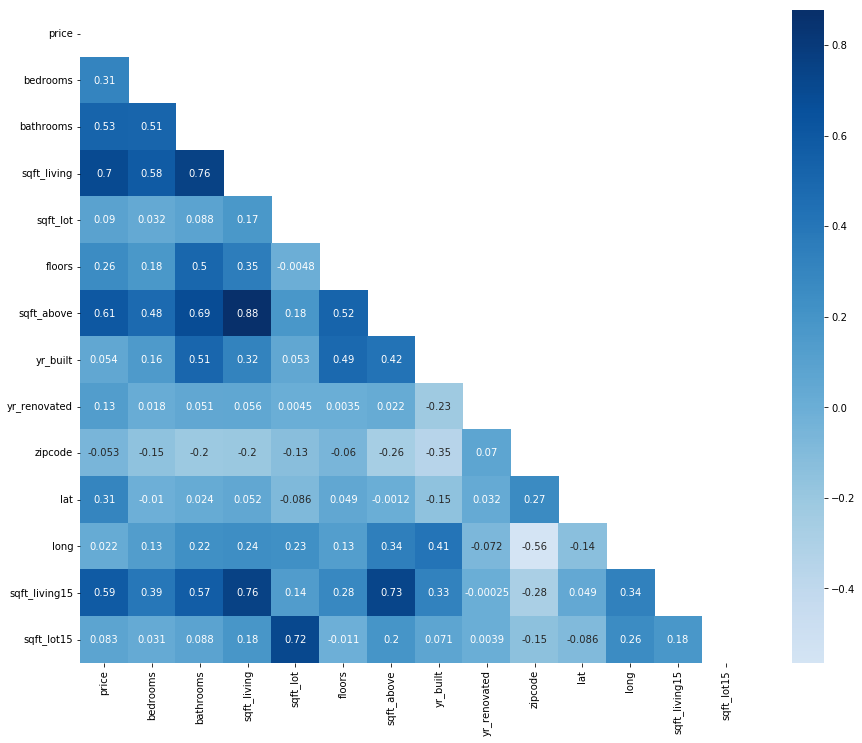

In [9]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(), center=0, ax=ax, annot=True, mask=np.triu(np.ones_like(df.corr(), dtype=bool)), cmap="Blues");

### Scatterplot
We can also generate a scatterplot that shows us the different variables plotted and how they look plotted vs one another.

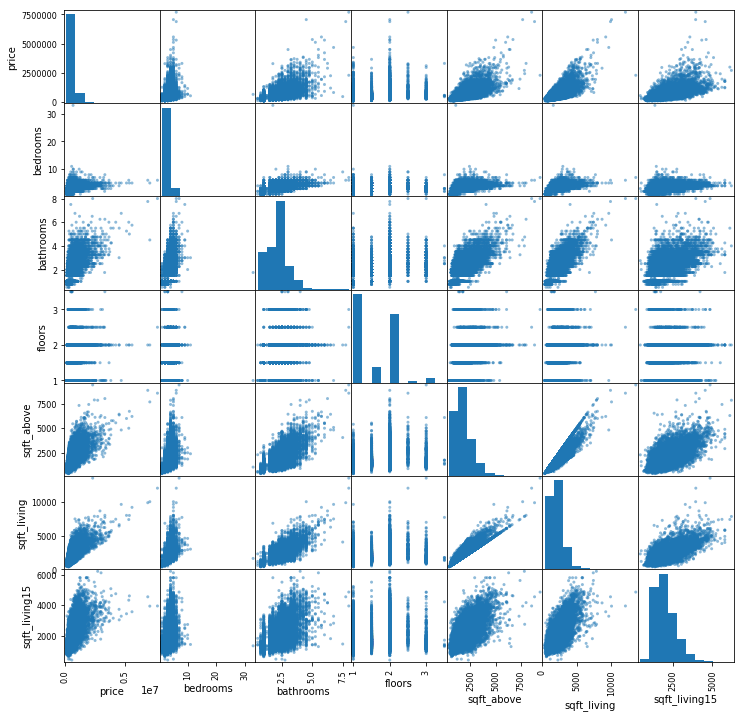

In [10]:
main=pd.DataFrame(df, columns = ['price',"bedrooms","bathrooms", "floors","sqft_above", "sqft_living","sqft_living15", "date"])
pd.plotting.scatter_matrix(main,figsize  = [12, 12]);

From this very first visualization we start to see some linear correlations with price of the houses, in particular with number of bathrooms, sqft_above, sqft_living and sqft_living 15.
Let us plot these out.

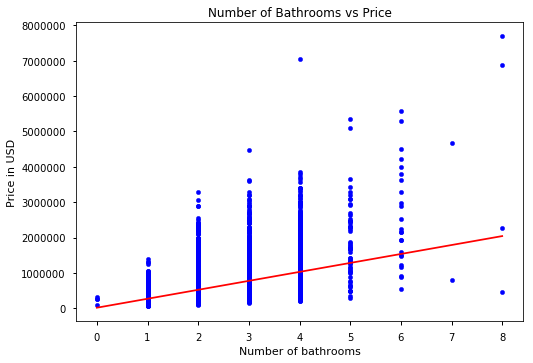

In [207]:
ax=df.plot.scatter(x='bathrooms',y='price',color='blue')
ax.set_title("Number of Bathrooms vs Price")
ax.set_xlabel("Number of bathrooms")
ax.set_ylabel("Price in USD")
plt.plot(np.unique(df['bathrooms']), np.poly1d(np.polyfit(df['bathrooms'],\
                    df['price'], 1))(np.unique(df['bathrooms'])), color='red');

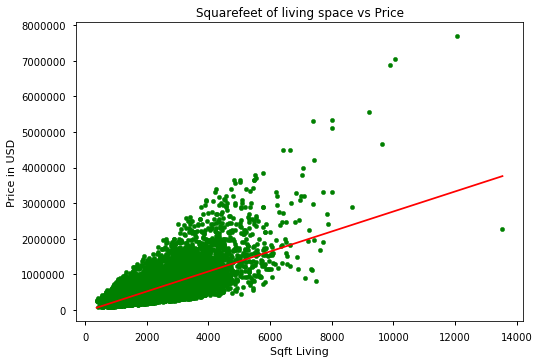

In [215]:
ax=df.plot.scatter(x='sqft_living',y='price',color='green')
ax.set_title("Squarefeet of living space vs Price")
ax.set_xlabel("Sqft Living")
ax.set_ylabel("Price in USD")
plt.plot(np.unique(df['sqft_living']), np.poly1d(np.polyfit(df['sqft_living'],\
                    df['price'], 1))(np.unique(df['sqft_living'])), color='red');

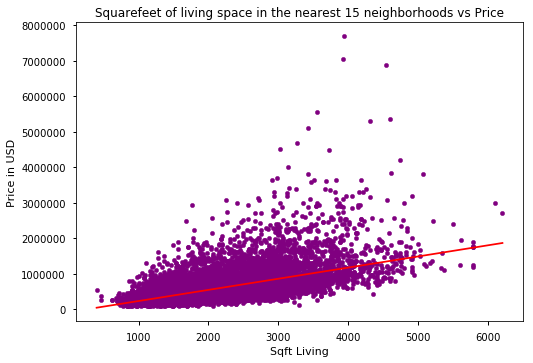

In [212]:
ax=df.plot.scatter(x='sqft_living15',y='price',color='purple')
ax.set_title("Squarefeet of living space in the nearest 15 neighborhoods vs Price")
ax.set_xlabel("Sqft Living")
ax.set_ylabel("Price in USD")
plt.plot(np.unique(df['sqft_living15']), np.poly1d(np.polyfit(df['sqft_living15'],\
                    df['price'], 1))(np.unique(df['sqft_living15'])), color='red');

### Correlation matrix
We are going to need this more in detail later but a correlation matrix can also give us a better sense of what are the correlations between the variables.

In [12]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294


There are some interesting correlations here.
As we expected especially for number of bedrooms, bathrooms, living sqfootage and sqft above.
Interestingly enough there is also a correlation with the sqft of the houses nearby.
<br> To better study and understand these correlations we are going to do some data preparation, using one hot encoding and then running a linear regression model and then we will proceed to try to improve our model getting rid of outliers and studying the correlation coefficients.

## Clean the data <a id='Clean_the_Data'></a>
### Change formats
Some of the data is in the format 'object' and therefore cannot be included in the calculations. 
<br>In one case, basement sqft it is probably a matter of just changing the format, while other entries like condition and grade are string values that need to be translated into something numerical that our model can work with.
<br>Consequently we are going to use the method "One Hot Encoding" to change the format of the categorical variables to be able to include them in our calculation. 

In [13]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
602.0         1
906.0         1
1990.0        1
3500.0        1
1920.0        1
Name: sqft_basement, Length: 304, dtype: int64

Clearly most of the values are numerical, and can be easily turned into a numerical format, while we are going to change the value '?' into zero, as we are not aware of what is the square footage of the basement, it is safer to do this compared to assuming some other value for it.

In [14]:
df['sqft_basement'] = df['sqft_basement'].replace('?','0.0')

In [15]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [16]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

Some other columns are not numerical but can be converted. For example "grade" has actually a number representing it but because it is followed also by a string its format is object.
Let us take care of that.

In [18]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [19]:
# Creating a dictionary using which we will remap the values
dict = {'7 Average' : 7,'8 Good': 8,'9 Better':9,'6 Low Average':6,'10 Very Good':10,'11 Excellent':11,'5 Fair':5,\
        '12 Luxury':12,'4 Low':4,'13 Mansion':13 ,'3 Poor':3}
 
# Remap the values of the dataframe
df=df.replace({"grade": dict})

In [20]:
df['grade'] = df['grade'].astype(float)

Now let us explore the column 'condition'. Maybe we can also replace that easily with numerical values.

In [21]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

From the reference that has been given to us (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) it is clear that the values for condition are to be interepreted as follows:
Relative to age and grade. Coded 1-5.

1 = Poor

2 = Fair

3 = Average

4 = Good

5= Very Good

We will then translate those values in the same way

In [22]:
dict = {'Poor':1, 'Fair':2, 'Average': 3,'Good': 4,'Very Good':5}
 
# Remap the values of the dataframe
df=df.replace({"condition": dict})

In [23]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  float64
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

### Handling missing values

In [25]:
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

As we can see the columns that have missing values are 'waterfront', 'view' and 'year renovated'.
There are clear reasons for some values to be missing as not all of the houses have a waterfront or information about the view,
and not all the houses were renovated. We will use that information later and separately, but for now we are not going to include these variables in our model so there is not need to worry about them.

### Preliminary Regression Model

Running a linear regression here before one hot encoding. This is very early on and super preliminary but we can do this just to get a first sense.
Because of the large amount of null values in waterfront and view I have to drop them, or my model can't work.

In [26]:
df.drop(['view', 'waterfront'], axis=1, inplace=True)

In [27]:
y=df['price']
X=df.drop(['price', 'date', 'yr_renovated'], axis=1)

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [28]:
linreg.coef_

array([-4.66361524e+04,  4.74092519e+04,  1.25879803e+02,  1.51083013e-01,
        1.26493075e+04,  2.58884623e+04,  1.03112330e+05,  6.12191320e+01,
        5.48663289e+01, -3.06626448e+03, -4.84703935e+02,  5.50309302e+05,
       -2.48497782e+05,  3.80697831e+01, -3.21273794e-01])

In [29]:
linreg.intercept_

-3720645.3818795923

In [30]:
R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.CYAN} The R squared value for this Preliminary Regression model is {Style.RESET_ALL}", R2) 

 The R squared value for this Preliminary Regression model is  0.6608796277809059


As a very preliminary regression model we got an R squared of 0.66. That means that our first draft model explain about 66% of the data. It is not terrible but there is definitely room for improvement.

In [31]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     2804.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:47:39   Log-Likelihood:            -2.9571e+05
No. Observations:               21597   AIC:                         5.915e+05
Df Residuals:                   21581   BIC:                         5.916e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.721e+06   3.09e+06     -1.203      0.229   -9.78e+06    2.34e+06
bedrooms      -4.664e+04   2008.144    -23.224      0.000   -5.06e+04   -4.27e+04
bathrooms      4.741e+04   3443.208     13.769      0.000    4.07e+04    5.42e+04
sqft_living     125.8798     19.208      6.553      0.000      88.230     163.529
sqft_lot          0.1511      0.051      2.966      0.003       0.051       0.251
floors         1.265e+04   3823.290      3.308      0.001    5155.376    2.01e+04
condition      2.589e+04   2464.791     10.503      0.000    2.11e+04    3.07e+04
grade          1.031e+05   2287.988     45.067      0.000    9.86e+04    1.08e+05
sqft_above       61.2191     19.197      3.189      0.001      23.592      98.846
sqft_basement    54.8663     19.039      2.882      0.004      17.549      92.184
yr_built      -3066.2645     72.865    -42.082      0.000   -3209.085   -2923.444
zipcode        -484.7039     34.925    -13.879      0.000    -553.159    -416.249
lat            5.503e+05   1.13e+04     48.493      0.000    5.28e+05    5.73e+05
long          -2.485e+05    1.4e+04    -17.800      0.000   -2.76e+05   -2.21e+05
sqft_living15    38.0698      3.619     10.521      0.000      30.977      45.162
sqft_lot15       -0.3213      0.078     -4.120      0.000      -0.474      -0.168
==============================================================================
Omnibus:                    19469.874   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1929787.031
Skew:                           3.950   Prob(JB):                         0.00
Kurtosis:                      48.630   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let us look at which ones are the variables which have the highest coefficients.

In [32]:
coefficients=model.params
sort_coef=coefficients.sort_values(ascending=False)
sort_coef[0:10]

lat              550309.302063
grade            103112.329822
bathrooms         47409.251943
condition         25888.462328
floors            12649.307510
sqft_living         125.879803
sqft_above           61.219132
sqft_basement        54.866329
sqft_living15        38.069783
sqft_lot              0.151083
dtype: float64

### One Hot Encoding <a id='OHE'></a>

One Hot Encoding is a method that allows us to transform categorical variables into numerical ones to be able to better include them in our model.
<br>Some variables that can be considered categorical are the number of bedrooms and bathrooms and floors.
<br>So let us start from there.

In [33]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6.0,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,3,8.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,3,8.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,3,7.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,3,8.0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


The numbers of bathrooms are not integers, but divided in different ways whether there is a toilet or a sink or a shower...
This with one hot encoding would lead us to have A LOT of columns and also correlation will be more confusing to interpret. So to make this a little simpler I am going to round them up.

In [34]:
#Rounding up number of bathrooms

df['bathrooms']=df['bathrooms'].round(0)
df['bathrooms'].value_counts()

2.0    13847
1.0     3931
3.0     2527
4.0     1201
5.0       57
6.0       24
8.0        4
0.0        4
7.0        2
Name: bathrooms, dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Categorical columns
cat_columns = ['bedrooms', 'bathrooms', 'floors']

# Fit encoder on training set
ohe.fit(df[cat_columns])

# Get new column names
new_cat_columns = ohe.get_feature_names(input_features=cat_columns)

# Transform training set
df_cat = pd.DataFrame(ohe.fit_transform(df[cat_columns]),
                           columns=new_cat_columns, index=df.index)

# Replace training columns with transformed versions
ohe_df = pd.concat([df.drop(cat_columns, axis=1), df_cat], axis=1)
ohe_df

,date,price,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,...,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,10/13/2014,221900.0,1180,5650,3,7.0,1180,0.0,1955,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,12/9/2014,538000.0,2570,7242,3,7.0,2170,400.0,1951,1991.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2/25/2015,180000.0,770,10000,3,6.0,770,0.0,1933,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,12/9/2014,604000.0,1960,5000,5,7.0,1050,910.0,1965,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2/18/2015,510000.0,1680,8080,3,8.0,1680,0.0,1987,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,1530,1131,3,8.0,1530,0.0,2009,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,2/23/2015,400000.0,2310,5813,3,8.0,2310,0.0,2014,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21594,6/23/2014,402101.0,1020,1350,3,7.0,1020,0.0,2009,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21595,1/16/2015,400000.0,1600,2388,3,8.0,1600,0.0,2004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


So these are now our columns:

In [36]:
ohe_df.columns

Index(['date', 'price', 'sqft_living', 'sqft_lot', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'bedrooms_1',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11',
       'bedrooms_33', 'bathrooms_0.0', 'bathrooms_1.0', 'bathrooms_2.0',
       'bathrooms_3.0', 'bathrooms_4.0', 'bathrooms_5.0', 'bathrooms_6.0',
       'bathrooms_7.0', 'bathrooms_8.0', 'floors_1.0', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5'],
      dtype='object')

## OHE Linear Regression Model <a id='OHELRM'></a>
We are ready now for our first linear regression model!
<br>Let us run it, and we are going to keep all the possible variables, with only the essential exceptions.
<br>We are going to be excluding view and waterfront, since they have a lot of missing values therefore they describe a small part of the data anyway. 
<br>The variables date and year renovated are numerical but because of their particular meaning I am going to treat them separately later on to do a more in depth analysis about them.

In [37]:
y=ohe_df['price']
X=ohe_df.drop(['price','date', 'yr_renovated'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [38]:
R2= metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.BLUE} The R squared value for this model done after One-Hot-Encoding is {Style.RESET_ALL}", R2) 

 The R squared value for this model done after One-Hot-Encoding is  0.6831990089433897


Running the same model but with statsmodel to have more information

In [39]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1292.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:47:39   Log-Likelihood:            -2.9498e+05
No. Observations:               21597   AIC:                         5.900e+05
Df Residuals:                   21560   BIC:                         5.903e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     110.1687     18.585      5.928      0.000      73.740     146.598
sqft_lot          0.1330      0.049      2.698      0.007       0.036       0.230
condition      3.158e+04   2405.178     13.130      0.000    2.69e+04    3.63e+04
grade          1.068e+05   2233.594     47.814      0.000    1.02e+05    1.11e+05
sqft_above       50.1122     18.616      2.692      0.007      13.623      86.601
sqft_basement    58.0151     18.433      3.147      0.002      21.885      94.145
yr_built      -2670.9430     76.036    -35.127      0.000   -2819.980   -2521.906
zipcode        -513.2521     33.875    -15.151      0.000    -579.650    -446.854
lat            5.376e+05   1.11e+04     48.604      0.000    5.16e+05    5.59e+05
long          -2.171e+05   1.36e+04    -15.926      0.000   -2.44e+05    -1.9e+05
sqft_living15    56.6105      3.557     15.916      0.000      49.639      63.582
sqft_lot15       -0.3891      0.076     -5.153      0.000      -0.537      -0.241
bedrooms_1      9.34e+05   6.97e+05      1.340      0.180   -4.33e+05     2.3e+06
bedrooms_2     8.959e+05   6.97e+05      1.285      0.199   -4.71e+05    2.26e+06
bedrooms_3     8.504e+05   6.97e+05      1.220      0.222   -5.16e+05    2.22e+06
bedrooms_4     8.015e+05   6.97e+05      1.150      0.250   -5.64e+05    2.17e+06
bedrooms_5     7.926e+05   6.97e+05      1.138      0.255   -5.73e+05    2.16e+06
bedrooms_6     7.378e+05   6.97e+05      1.059      0.290   -6.28e+05     2.1e+06
bedrooms_7     5.632e+05   6.97e+05      0.808      0.419   -8.04e+05    1.93e+06
bedrooms_8     7.919e+05   6.98e+05      1.134      0.257   -5.77e+05    2.16e+06
bedrooms_9     2.481e+05   7.01e+05      0.354      0.723   -1.13e+06    1.62e+06
bedrooms_10    5.642e+05   7.04e+05      0.801      0.423   -8.16e+05    1.94e+06
bedrooms_11    5.936e+05   7.22e+05      0.822      0.411   -8.22e+05    2.01e+06
bedrooms_33    9.474e+05   7.24e+05      1.309      0.191   -4.71e+05    2.37e+06
bathrooms_0.0  3.794e+05   9.34e+05      0.406      0.685   -1.45e+06    2.21e+06
bathrooms_1.0  4.563e+05   9.28e+05      0.491      0.623   -1.36e+06    2.28e+06
bathrooms_2.0  4.332e+05   9.28e+05      0.467      0.641   -1.39e+06    2.25e+06
bathrooms_3.0  4.719e+05   9.28e+05      0.508      0.611   -1.35e+06    2.29e+06
bathrooms_4.0  5.703e+05   9.29e+05      0.614      0.539   -1.25e+06    2.39e+06
bathrooms_5.0  1.011e+06   9.29e+05      1.088      0.276   -8.09e+05    2.83e+06
bathrooms_6.0  1.399e+06   9.29e+05      1.505      0.132   -4.23e+05    3.22e+06
bathrooms_7.0  1.301e+06   9.38e+05      1.387      0.165   -5.37e+05    3.14e+06
bathrooms_8.0  2.699e+06   9.35e+05      2.888      0.004    8.67e+05    4.53e+06
floors_1.0     1.375e+06   1.39e+06      0.988      0.323   -1.35e+06     4.1e+06
floors_1.5     1.384e+06   1.39e+06      0.995   

Before doing a train-test split and doing cross validation for our model, let's try to improve the model increasing the R squared and once we have the best one we will run the cross validation too.

## Trying to improve my model <a id='impr'></a>
We are going now to take several different steps to try to improve this first linear regression model.
We already took care of the categorical variables with one hot encoding.
Now it is time to work on the continuous ones, and we will first normalize them and then scale them, whenever necessary, to satify the normality assumption for running this type of model.

### Transforming the variables, normalizing and scaling them
The easiest way to see if a variable is normally distributed is by plotting histograms that can show us visually which variables are already pretty normalized and which ones would need a transformation or have heavy outliers.

The continuous variables on which I chose to focus on so far are: sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, sqftliving_15 and sqft_lot_15.

In [40]:
cols=['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement', 'yr_built', 'sqft_living15',
       'sqft_lot15']

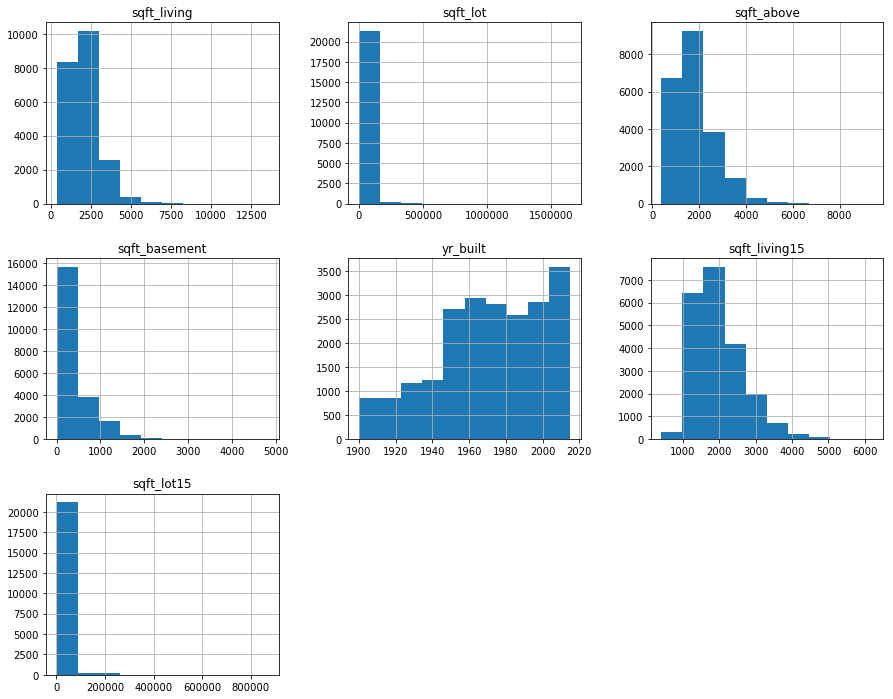

In [41]:
df[cols].hist(figsize  = [15,12]); 

From what I can observe, squarefoot living, sqft above and sqft living 15 could probably beneficiate from logarythmic normalization.
<br>Sqft basement, Sqft lot and Sqft lot15 are also not following a normal distribution but they seem to be zero-inflated variables which is complicated to work with, so we might just leave them as they are.
<br>Bedrooms probably has an outlier that might be cause by a typo.

In [42]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

As expected, there are a lot of zeros for these variables.
<br>It was probably classified this way when there is simply no basement in the house. 
<br>But I also don't want to drop all the columns with no basement, since 13280 is a consistent number and I don't want to lose all of that information.
<br>I will leave it as is for now and select the features which don't have this characteristic.

### Outliers <a id='Out'></a>
I want to inspect the bedroom variable and then we will move on to transformation and scaling.

In [43]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Yes, 33 seems like a typo so we will just remove that.

In [44]:
df.drop(df.loc[df['bedrooms']==33].index, inplace=True) #let's remove it from our original data frame
ohe_df.drop('bedrooms_33', axis=1, inplace=True)# and also form the one hot encoding one

In [45]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

### Transformations <a id='Trans'></a>

A simple way to normalize a variable is by transforming it, taking the logarythm of its value, since the log is a monotonically icreasing function this is not going to change the overall trend of our variable but is going to help us satisfy the requirements for the model, to have normally distributed variables.
We just need to remember when we are trying to draw some conclusions about these variables, that now we are working with the logarythm and not the original value itself.

In [46]:
df_log=pd.DataFrame()
non_normal = ['sqft_living', 'sqft_above', 'sqft_living15']
for feat in non_normal:
    df_log[feat] = df[feat].map(lambda x: np.log(x))
df_log = df_log.add_suffix('_log')

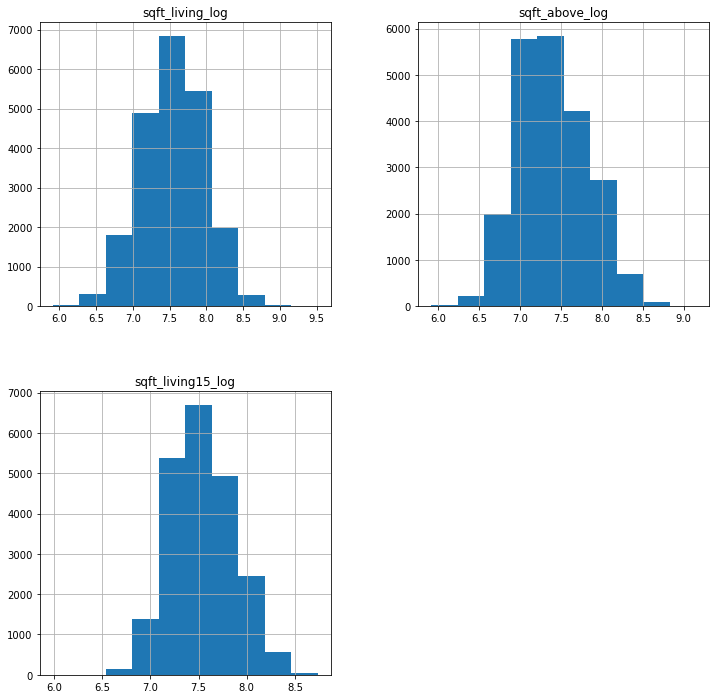

In [47]:
df_log.hist(figsize  = [12,12]); 

The values are a little more normal now. 

### Scaling <a id='Scale'></a>

I am not certain whether min-max scaling or normalization is a better option. So I am going to try to transform all the variables with one and then the other, and see which one brins the better results.

### Min Max Scaling

In the min max scaling each value gets the min subtracted and is divided by the difference between the max and the min of that variable.
In this way all the values fall between 0 and 1.

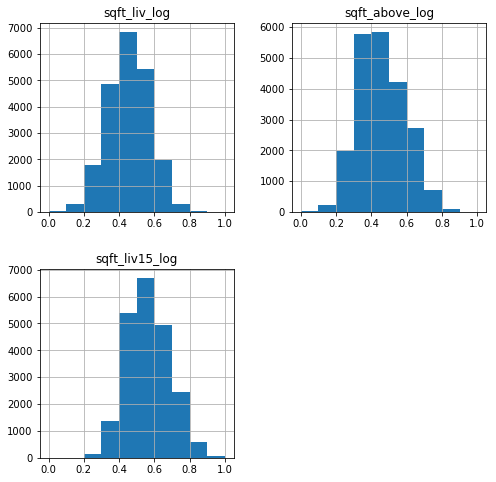

In [48]:
### Before this code block add the formula of the min max scaler in formula version
sqll = df_log['sqft_living_log']
sqal  = df_log['sqft_above_log']
sq1v15 = df_log['sqft_living15_log']

scaled_sqll = (sqll - min(sqll)) / (max(sqll) - min(sqll))
scaled_sqal = (sqal - min(sqal)) / (max(sqal) - min(sqal))
scaled_sq1v15 = (sq1v15 - min(sq1v15)) / (max(sq1v15) - min(sq1v15))

data_cont_mmscaled = pd.DataFrame([])
data_cont_mmscaled['sqft_liv_log'] = scaled_sqll
data_cont_mmscaled['sqft_above_log'] = scaled_sqal
data_cont_mmscaled['sqft_liv15_log'] = scaled_sq1v15

data_cont_mmscaled.hist(figsize = [8,8]);

In [49]:
mmscaled_df=pd.concat([ohe_df,data_cont_mmscaled], axis=1)

In [50]:
mmscaled_df.head()

,date,price,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,...,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,sqft_liv_log,sqft_above_log,sqft_liv15_log
0,10/13/2014,221900.0,1180,5650,3,7.0,1180,0.0,1955,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.322166,0.358392,0.441342
1,12/9/2014,538000.0,2570,7242,3,7.0,2170,400.0,1951,1991.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.538392,0.546652,0.525882
2,2/25/2015,180000.0,770,10000,3,6.0,770,0.0,1933,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.203585,0.226478,0.699256
3,12/9/2014,604000.0,1960,5000,5,7.0,1050,910.0,1965,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.463123,0.322322,0.446739
4,2/18/2015,510000.0,1680,8080,3,8.0,1680,0.0,1987,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.420302,0.467563,0.548854


At this point I can drop the columns that I transformed and scaled

In [51]:
mmscaled_df.drop(['sqft_living', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)
mmscaled_df = mmscaled_df.dropna() # I checked and the NA values are only 3, I'll get rid of them now or they will
#Give me trouble with the fit

In [52]:
mmscaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17754 entries, 0 to 21596
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            17754 non-null  object 
 1   price           17754 non-null  float64
 2   sqft_lot        17754 non-null  int64  
 3   condition       17754 non-null  int64  
 4   grade           17754 non-null  float64
 5   sqft_basement   17754 non-null  float64
 6   yr_built        17754 non-null  int64  
 7   yr_renovated    17754 non-null  float64
 8   zipcode         17754 non-null  int64  
 9   lat             17754 non-null  float64
 10  long            17754 non-null  float64
 11  sqft_lot15      17754 non-null  int64  
 12  bedrooms_1      17754 non-null  float64
 13  bedrooms_2      17754 non-null  float64
 14  bedrooms_3      17754 non-null  float64
 15  bedrooms_4      17754 non-null  float64
 16  bedrooms_5      17754 non-null  float64
 17  bedrooms_6      17754 non-null 

### Normalizing instead of min max scaling

Instead of using the MinMax scaler I am going to use a normalizer, which substracts the mean from the value and divides by the standard deviation.
The features scaled this way are centered around zero and have a standard deviation of 1.

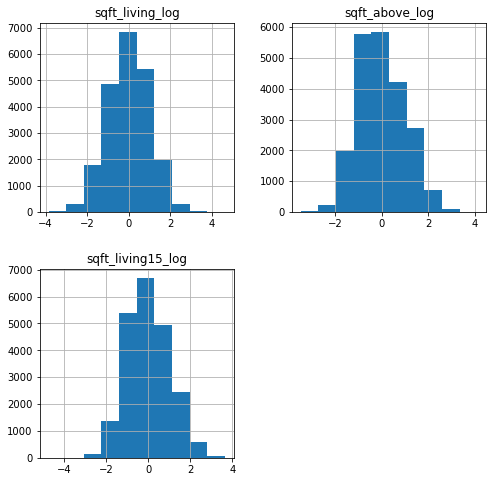

In [53]:
### Before this block, write out the formula, in formula format, of the normal scaler
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_cont_norm = df_log.apply(normalize)
data_cont_norm.hist(figsize  = [8, 8]);

In [54]:
norm_df=pd.concat([ohe_df,data_cont_norm], axis=1)

In [55]:
norm_df.drop(['sqft_living', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)
norm_df = norm_df.dropna()

In [56]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17754 entries, 0 to 21596
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               17754 non-null  object 
 1   price              17754 non-null  float64
 2   sqft_lot           17754 non-null  int64  
 3   condition          17754 non-null  int64  
 4   grade              17754 non-null  float64
 5   sqft_basement      17754 non-null  float64
 6   yr_built           17754 non-null  int64  
 7   yr_renovated       17754 non-null  float64
 8   zipcode            17754 non-null  int64  
 9   lat                17754 non-null  float64
 10  long               17754 non-null  float64
 11  sqft_lot15         17754 non-null  int64  
 12  bedrooms_1         17754 non-null  float64
 13  bedrooms_2         17754 non-null  float64
 14  bedrooms_3         17754 non-null  float64
 15  bedrooms_4         17754 non-null  float64
 16  bedrooms_5         177

## MinMax Scaler Linear Regression <a id='MMLRM'></a>
Let us try a linear regression with the Min Max scaling, and then I will do it again with the normal scaling and we can compare the results.

In [57]:
y=mmscaled_df['price']
X=mmscaled_df.drop(['price', 'date', 'yr_renovated'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)
LinearRegression()

LinearRegression()

In [58]:
R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.MAGENTA} The R squared value for this model scaled with MinMaxScaling is {Style.RESET_ALL}", R2) 

 The R squared value for this model scaled with MinMaxScaling is  0.6680329311758564


## Normal Scaler Linear Regression <a id='NLRM'></a>

In [59]:
y=norm_df['price']
X=norm_df.drop(['price', 'date', 'yr_renovated'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [60]:
R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.GREEN} The R squared value for this model scaled with Normal Scaler is {Style.RESET_ALL}", R2) 

 The R squared value for this model scaled with Normal Scaler is  0.6680329311758566


How interesting! The two different scaling give us a very similar R squared value, almost exactly the same!
Also R squared has not really improved, it has actually slightly decreased form the scaling and normalization.
We didn't expect the transformations to increase considerably the model performance, but it was still important to do them to be able to run a linear regression model fulfilling all the assumptions.
But there is still more improving that we can do for the model!

Next I would like to check for multicollinearity and try to drop the variables that have p>0.05, and see if in that way the model improves.

## Multicollinearity <a id='Multi'></a>

Multicollinearity is when the assumptions that all the variables are independent is NOT fulfilled, which can cause problems because if one variable is strictly dependent on another then the model interpretation becomes hard.
<br>This is so because in general we want to be able to tell which one of the specific variables is influencing the target in which specific way, but if two variables influence also each other it is hard to interpret that.
<br>Multicollinearity is also a direct consequence of One-Hot-Encoding, but we can fix that by dropping one variable for each category that we splitted with OHE.

In [61]:
#norm_df.info()

In [62]:
#pd.plotting.scatter_matrix(norm_df,figsize  = [15,15]);
#plt.show()

In [63]:
norm_df.corr()

,price,sqft_lot,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,sqft_living_log,sqft_above_log,sqft_living15_log
price,1.000000,0.086074,0.032949,0.664504,0.319843,0.050256,0.129603,-0.052439,0.306066,0.020926,...,0.154034,-0.261084,0.014384,0.229504,0.131240,0.019102,0.021277,0.611286,0.542655,0.542390
sqft_lot,0.086074,1.000000,-0.009608,0.108788,0.019563,0.048692,0.004511,-0.129647,-0.085203,0.232744,...,0.027816,-0.009308,0.010397,0.019203,0.003690,-0.047966,-0.005346,0.145450,0.157232,0.146158
condition,0.032949,-0.009608,1.000000,-0.149628,0.162592,-0.365949,-0.061840,0.004639,-0.017034,-0.106684,...,-0.003694,0.211917,0.142960,-0.270522,0.009865,-0.096006,-0.002175,-0.056031,-0.154295,-0.092423
grade,0.664504,0.108788,-0.149628,1.000000,0.166646,0.444993,0.016663,-0.185005,0.114012,0.200788,...,0.046002,-0.425546,-0.128138,0.469719,0.095558,0.073929,0.015780,0.743928,0.743780,0.692243
sqft_basement,0.319843,0.019563,0.162592,0.166646,1.000000,-0.129812,0.071199,0.070592,0.107610,-0.140561,...,0.063728,0.241267,-0.020929,-0.211696,0.021191,-0.082406,-0.000703,0.418480,-0.049840,0.207794
yr_built,0.050256,0.048692,-0.365949,0.444993,-0.129812,1.000000,-0.225224,-0.345201,-0.146994,0.408435,...,0.002757,-0.352979,-0.388318,0.529616,-0.034053,0.193947,0.010581,0.348081,0.449379,0.330919
yr_renovated,0.129603,0.004511,-0.061840,0.016663,0.071199,-0.225224,1.000000,0.069852,0.032157,-0.072168,...,0.015506,-0.022511,0.045797,-0.001107,0.037602,-0.026650,-0.003845,0.051415,0.024978,-0.003579
zipcode,-0.052439,-0.129647,0.004639,-0.185005,0.070592,-0.345201,0.069852,1.000000,0.264259,-0.562973,...,0.001890,0.058389,0.144132,-0.183613,0.026590,0.102223,0.010394,-0.223640,-0.290505,-0.292558
lat,0.306066,-0.085203,-0.017034,0.114012,0.107610,-0.146994,0.032157,0.264259,1.000000,-0.134486,...,0.007663,-0.037696,0.071130,-0.046154,0.018655,0.117893,0.010480,0.041749,-0.015044,0.041013
long,0.020926,0.232744,-0.106684,0.200788,-0.140561,0.408435,-0.072168,-0.562973,-0.134486,1.000000,...,0.000102,-0.144835,-0.137693,0.278403,-0.020093,-0.133946,-0.014993,0.258483,0.362585,0.340884


In [64]:
abs(norm_df.corr()) > 0.75

,price,sqft_lot,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,sqft_living_log,sqft_above_log,sqft_living15_log
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
long,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [65]:
df_cc=norm_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_cc['pairs'] = list(zip(df_cc.level_0, df_cc.level_1))

# set index to pairs
df_cc.set_index(['pairs'], inplace = True)

#drop level columns
df_cc.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_cc.columns = ['cc']

In [66]:
df_cc.drop_duplicates(inplace=True)
df_cc[(df_cc.cc>.75) & (df_cc.cc <1)]

,cc
pairs,
"(sqft_above_log, sqft_living_log)",0.864459
"(floors_2.0, floors_1.0)",0.777444
"(sqft_living_log, sqft_living15_log)",0.750127


It looks like squarefoot living and squarefoot above are strongly correlated and that makes sense.
<br> Also squarefoot living and squarefoot living 15 are correlated so I will drop squarefoot living since it is in both high correlations.
<br>1 floor and 2 floors are too, as we know from one hot encoding when we are supposed to drop the first column to avoid multicollineairty. I will drop one column for each categorical value in the following LRM.
<br>But first we are going to check the ohe linear model we previously ran, but doing it with statsmodel to see the coefficients, so to drop the ones that have p>0.05

## P values, F-statistic <a id='PF'></a>

Same model that we ran right after normalization, doing it with statsmodel to see the coefficients.

In [67]:
norm_df.drop('date', axis=1, inplace=True)

In [68]:
y=norm_df['price']
X=norm_df.drop(['price', 'yr_renovated'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1019.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:47:45   Log-Likelihood:            -2.4300e+05
No. Observations:               17754   AIC:                         4.861e+05
Df Residuals:                   17718   BIC:                         4.863e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.602e+05   2.52e+06      0.342      0.733   -4.07e+06    5.79e+06
sqft_lot              0.1303      0.055      2.364      0.018       0.022       0.238
condition          3.156e+04   2724.361     11.585      0.000    2.62e+04    3.69e+04
grade              1.281e+05   2464.039     51.989      0.000    1.23e+05    1.33e+05
sqft_basement       229.4662      9.987     22.975      0.000     209.890     249.043
yr_built          -2838.4501     86.474    -32.824      0.000   -3007.948   -2668.952
zipcode            -456.6283     38.502    -11.860      0.000    -532.095    -381.161
lat                5.384e+05   1.26e+04     42.892      0.000    5.14e+05    5.63e+05
long              -1.942e+05   1.54e+04    -12.601      0.000   -2.24e+05   -1.64e+05
sqft_lot15           -0.2189      0.084     -2.592      0.010      -0.384      -0.053
bedrooms_1         3.094e+05   2.31e+05      1.339      0.180   -1.43e+05    7.62e+05
bedrooms_2         2.495e+05   2.31e+05      1.081      0.280   -2.03e+05    7.02e+05
bedrooms_3         1.974e+05    2.3e+05      0.857      0.392   -2.54e+05    6.49e+05
bedrooms_4         1.683e+05    2.3e+05      0.730      0.465   -2.83e+05     6.2e+05
bedrooms_5         1.686e+05    2.3e+05      0.732      0.464   -2.83e+05     6.2e+05
bedrooms_6         1.213e+05   2.31e+05      0.526      0.599   -3.31e+05    5.73e+05
bedrooms_7         3.101e+04   2.33e+05      0.133      0.894   -4.26e+05    4.88e+05
bedrooms_8         1.946e+05   2.37e+05      0.820      0.412    -2.7e+05     6.6e+05
bedrooms_9        -4.479e+05   2.44e+05     -1.839      0.066   -9.25e+05    2.95e+04
bedrooms_10       -1.038e+05   2.55e+05     -0.407      0.684   -6.04e+05    3.96e+05
bedrooms_11        -2.81e+04   3.01e+05     -0.094      0.925   -6.17e+05    5.61e+05
bathrooms_0.0     -6.994e+05   3.02e+05     -2.318      0.020   -1.29e+06   -1.08e+05
bathrooms_1.0     -7.121e+05   2.81e+05     -2.534      0.011   -1.26e+06   -1.61e+05
bathrooms_2.0     -7.333e+05   2.81e+05     -2.611      0.009   -1.28e+06   -1.83e+05
bathrooms_3.0     -6.821e+05   2.81e+05     -2.427      0.015   -1.23e+06   -1.31e+05
bathrooms_4.0     -5.378e+05   2.81e+05     -1.912      0.056   -1.09e+06    1.37e+04
bathrooms_5.0     -6526.8975   2.82e+05     -0.023      0.982    -5.6e+05    5.47e+05
bathrooms_6.0      4.762e+05   2.85e+05      1.673      0.094   -8.18e+04    1.03e+06
bathrooms_7.0      1.738e+06    3.4e+05      5.107      0.000    1.07e+06    2.41e+06
bathrooms_8.0      2.017e+06   2.99e+05      6.751      0.000    1.43e+06     2.6e+06
floors_1.0         6.968e+04   4.19e+05      0.166      0.868   -7.51e+05    8.91e+05
floors_1.5          6.26e+04   4.19e+05      0.149      0.881   -7.59e+05    8.84e+05
floors_2.0         9.195e+04   4.19e+05      0.219      0.826    -7.3e+05

Beside all the categorical values from one hot encoding, none of the other variables have p>0.05.
So le us run another linear regression model dropping a column for each categorical variable and see if it improves.

## P-values Linear Regression Model <a id='PFLRM'></a>

We are removing the values that have high collinearity because of the one hot encoding, and also squarefoot living log that showed high collinearity with other variables.

In [69]:
y=norm_df['price']
X=norm_df.drop(['price', 'yr_renovated', 'bedrooms_1','bathrooms_1.0','floors_1.0','sqft_living_log'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1039.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:47:45   Log-Likelihood:            -2.4305e+05
No. Observations:               17754   AIC:                         4.862e+05
Df Residuals:                   17719   BIC:                         4.864e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.653e+06   3.44e+06      1.062      0.288   -3.09e+06    1.04e+07
sqft_lot              0.1275      0.055      2.307      0.021       0.019       0.236
condition          3.137e+04   2732.349     11.480      0.000     2.6e+04    3.67e+04
grade               1.27e+05   2468.794     51.425      0.000    1.22e+05    1.32e+05
sqft_basement       139.9384      4.921     28.436      0.000     130.292     149.584
yr_built          -2827.5925     86.724    -32.605      0.000   -2997.579   -2657.606
zipcode            -482.7142     38.532    -12.528      0.000    -558.240    -407.188
lat                5.337e+05   1.26e+04     42.421      0.000    5.09e+05    5.58e+05
long              -1.918e+05   1.55e+04    -12.408      0.000   -2.22e+05   -1.61e+05
sqft_lot15           -0.2325      0.085     -2.745      0.006      -0.398      -0.066
bedrooms_2        -7.201e+04   1.77e+04     -4.076      0.000   -1.07e+05   -3.74e+04
bedrooms_3        -1.312e+05   1.77e+04     -7.423      0.000   -1.66e+05   -9.66e+04
bedrooms_4        -1.669e+05   1.81e+04     -9.203      0.000   -2.02e+05   -1.31e+05
bedrooms_5         -1.66e+05   1.91e+04     -8.673      0.000   -2.03e+05   -1.28e+05
bedrooms_6         -2.12e+05   2.32e+04     -9.143      0.000   -2.57e+05   -1.67e+05
bedrooms_7        -3.017e+05   4.63e+04     -6.520      0.000   -3.92e+05   -2.11e+05
bedrooms_8        -1.295e+05   6.79e+04     -1.907      0.057   -2.63e+05    3602.718
bedrooms_9        -7.959e+05   9.14e+04     -8.711      0.000   -9.75e+05   -6.17e+05
bedrooms_10       -4.229e+05   1.25e+05     -3.376      0.001   -6.68e+05   -1.77e+05
bedrooms_11       -3.615e+05   2.15e+05     -1.684      0.092   -7.82e+05    5.92e+04
bathrooms_0.0     -2.234e+04   1.24e+05     -0.181      0.857   -2.65e+05     2.2e+05
bathrooms_2.0     -3.789e+04   5508.280     -6.879      0.000   -4.87e+04   -2.71e+04
bathrooms_3.0      1.333e+04   7972.599      1.672      0.094   -2293.791     2.9e+04
bathrooms_4.0      1.626e+05   1.05e+04     15.500      0.000    1.42e+05    1.83e+05
bathrooms_5.0      7.042e+05   3.23e+04     21.769      0.000    6.41e+05    7.68e+05
bathrooms_6.0      1.195e+06   5.21e+04     22.959      0.000    1.09e+06     1.3e+06
bathrooms_7.0      2.691e+06   2.15e+05     12.505      0.000    2.27e+06    3.11e+06
bathrooms_8.0      2.821e+06   1.11e+05     25.362      0.000     2.6e+06    3.04e+06
floors_1.5        -4006.1646   6450.690     -0.621      0.535   -1.67e+04    8637.819
floors_2.0         2.389e+04   5024.388      4.755      0.000     1.4e+04    3.37e+04
floors_2.5         1.631e+05   1.93e+04      8.443      0.000    1.25e+05    2.01e+05
floors_3.0         7.374e+04   1.12e+04      6.555      0.000    5.17e+04    9.58e+04
floors_3.5         2.228e+05   8.81e+04      2.529      0.011    5.01e+04

With this linear model R is still around 6.67 but more values with high p have emerged, specifically 'bedrooms_8', 'bedrooms_11','bathrooms_0.0', 'bathrooms_3.0' and 'floors_1.5' all have p-value>0.05.
<br> These might as well be false positives for p, given the high number of variables we are dealing with, but it doesn't hurt to try to remove them to see if there is actually something there.
<br>So we are going to try to drop them and run the model again, one last time, to try to improve with usual methods before switching to the big guns with Feature Engineering.

In [70]:
y=norm_df['price']
X=norm_df.drop(['price', 'yr_renovated', 'bedrooms_1','bathrooms_1.0','floors_1.0','sqft_living_log',\
                'bedrooms_8', 'bedrooms_11','bathrooms_0.0', 'bathrooms_3.0','floors_1.5'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1218.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:47:45   Log-Likelihood:            -2.4306e+05
No. Observations:               17754   AIC:                         4.862e+05
Df Residuals:                   17724   BIC:                         4.864e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.482e+06   3.44e+06      1.014      0.311   -3.25e+06    1.02e+07
sqft_lot              0.1304      0.055      2.359      0.018       0.022       0.239
condition          3.176e+04   2721.880     11.670      0.000    2.64e+04    3.71e+04
grade              1.274e+05   2462.483     51.754      0.000    1.23e+05    1.32e+05
sqft_basement       141.7439      4.649     30.491      0.000     132.632     150.856
yr_built          -2783.6834     81.688    -34.077      0.000   -2943.800   -2623.567
zipcode            -482.7520     38.484    -12.544      0.000    -558.184    -407.320
lat                5.341e+05   1.26e+04     42.495      0.000    5.09e+05    5.59e+05
long              -1.922e+05   1.54e+04    -12.445      0.000   -2.23e+05   -1.62e+05
sqft_lot15           -0.2331      0.085     -2.753      0.006      -0.399      -0.067
bedrooms_2        -6.126e+04    1.7e+04     -3.594      0.000   -9.47e+04   -2.79e+04
bedrooms_3        -1.189e+05    1.7e+04     -7.007      0.000   -1.52e+05   -8.56e+04
bedrooms_4        -1.539e+05   1.74e+04     -8.857      0.000   -1.88e+05    -1.2e+05
bedrooms_5        -1.518e+05   1.83e+04     -8.282      0.000   -1.88e+05   -1.16e+05
bedrooms_6        -1.968e+05   2.25e+04     -8.758      0.000   -2.41e+05   -1.53e+05
bedrooms_7        -2.861e+05   4.59e+04     -6.236      0.000   -3.76e+05   -1.96e+05
bedrooms_9        -7.773e+05   9.11e+04     -8.529      0.000   -9.56e+05   -5.99e+05
bedrooms_10       -4.068e+05   1.25e+05     -3.251      0.001   -6.52e+05   -1.62e+05
bathrooms_2.0     -4.455e+04   3821.691    -11.657      0.000    -5.2e+04   -3.71e+04
bathrooms_4.0      1.519e+05   8373.402     18.146      0.000    1.36e+05    1.68e+05
bathrooms_5.0      6.902e+05   3.15e+04     21.932      0.000    6.28e+05    7.52e+05
bathrooms_6.0      1.176e+06   5.13e+04     22.933      0.000    1.08e+06    1.28e+06
bathrooms_7.0      2.673e+06   2.15e+05     12.444      0.000    2.25e+06    3.09e+06
bathrooms_8.0      2.804e+06   1.11e+05     25.342      0.000    2.59e+06    3.02e+06
floors_2.0         2.525e+04   4914.721      5.138      0.000    1.56e+04    3.49e+04
floors_2.5          1.66e+05   1.92e+04      8.639      0.000    1.28e+05    2.04e+05
floors_3.0         7.566e+04   1.12e+04      6.756      0.000    5.37e+04    9.76e+04
floors_3.5         2.081e+05   8.75e+04      2.379      0.017    3.66e+04     3.8e+05
sqft_above_log     9.849e+04   3515.147     28.018      0.000    9.16e+04    1.05e+05
sqft_living15_log   3.78e+04   2671.593     14.149      0.000    3.26e+04     4.3e+04
==============================================================================
Omnibus:                    14687.799   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1446578.492
Skew:   

Doing all of these things has not been helpful to increase the R-squared value.
<br>Normalizing and scaling is not supposed to increase it, we do it only for our model to fit within the criteria of normality, and to avoid multicollinearity.
<br>It is time to do some feature engineering to see what other types of variables that are present in the data we have could help us improve our model.

## Feature Engineering <a id='FE'></a>

Feature engineering is about finding new features that we can incorporate in our model and that can improve the way it describes and fits the data. <br>We are going to look at three features that are already provided (renovations, zipcode and time of sale) but we are going to manipulate them so that they can tell us something more and the information that they carry can be better interpreted by the model.
<br>Then after that we are going to try an unusual way to find other features that can help our model too.

### Renovations <a id='Reno'></a>

Let us explore the information that we have about houses that were renovated:

In [71]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.0,1180,5650,1.0,3,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.0,2570,7242,2.0,3,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.0,770,10000,1.0,3,6.0,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.0,1960,5000,1.0,5,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.0,1680,8080,1.0,3,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [72]:
df['yr_renovated'].value_counts()

0.0       17010
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [73]:
df['yr_renovated'].isna().sum()

3842

In [74]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

Let us create a dataframe with only houses that were renovated so we can study them better

In [75]:
reno=pd.DataFrame()
reno=df.loc[df['yr_renovated']!=0]

In [76]:
reno

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,12/9/2014,538000.0,3,2.0,2570,7242,2.0,3,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
35,6/13/2014,696000.0,3,2.0,2300,3060,1.5,3,8.0,1510,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264
95,9/8/2014,905000.0,4,2.0,3300,10250,1.0,3,7.0,2390,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045
103,10/7/2014,1090000.0,3,2.0,2920,8113,2.0,3,8.0,2920,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113
125,3/2/2015,1450000.0,4,3.0,2750,17789,1.5,3,8.0,1980,770.0,1914,1992.0,98004,47.6141,-122.212,3060,11275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19602,7/12/2014,451000.0,2,1.0,900,6000,1.0,3,7.0,900,0.0,1944,2004.0,98115,47.6855,-122.289,1460,4800
20041,9/4/2014,434900.0,3,2.0,1520,5040,2.0,3,7.0,1520,0.0,1977,2006.0,98177,47.7770,-122.362,1860,8710
20428,2/25/2015,500012.0,4,2.0,2400,9612,1.0,3,8.0,1230,1170.0,1962,2009.0,98059,47.4799,-122.127,2430,5539
20431,2/12/2015,356999.0,3,2.0,1010,1546,2.0,3,8.0,1010,0.0,1971,2014.0,98144,47.5998,-122.311,1010,1517


Ok so the houses that have actually been renovated are only 744. Let us study them a little bit better.

In [77]:
reno.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,7.440000e+02,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,7.689019e+05,3.459677,2.306452,2327.377688,16215.530914,1.504704,3.219086,7.752688,1878.719086,436.306452,1939.455645,1995.928763,98095.623656,47.580564,-122.262043,1988.877688,13390.768817
std,6.271258e+05,1.068823,0.909150,1089.002040,38235.308760,0.493202,0.520494,1.196954,849.441413,547.024490,22.088850,15.599946,54.861316,0.120855,0.129586,715.440144,26213.648057
min,1.100000e+05,1.000000,1.000000,520.000000,1024.000000,1.000000,1.000000,4.000000,520.000000,0.000000,1900.000000,1934.000000,98001.000000,47.196000,-122.497000,828.000000,1281.000000
25%,4.122500e+05,3.000000,2.000000,1560.000000,5000.000000,1.000000,3.000000,7.000000,1267.500000,0.000000,1921.000000,1987.000000,98040.000000,47.523350,-122.358000,1460.000000,5000.000000
50%,6.075020e+05,3.000000,2.000000,2200.000000,7375.000000,1.500000,3.000000,8.000000,1730.000000,45.000000,1941.500000,2000.000000,98112.000000,47.602800,-122.292000,1850.000000,7455.000000
75%,9.000000e+05,4.000000,3.000000,2872.500000,12670.750000,2.000000,3.000000,8.000000,2300.000000,802.500000,1955.000000,2007.250000,98126.000000,47.670950,-122.210000,2380.000000,10925.750000
max,7.700000e+06,11.000000,8.000000,12050.000000,478288.000000,3.000000,5.000000,13.000000,8570.000000,4820.000000,2003.000000,2015.000000,98199.000000,47.777000,-121.359000,5500.000000,310582.000000


This is already giving us a lot of information.
<br>The houses that have been renovated have on average <span style="color:blue">3.46 bedrooms, 2.3 bathrooms, 2327 squarefeet</span> of living space.
These houses were on average built in 1939 and renovated around 1996 and sold on average for<span style="color:blue"> $768,902</span>.

Let us take a look at some information from the general database of houses that were NOT renovated.

In [78]:
noren=pd.DataFrame()
noren=df.loc[df['yr_renovated']==0]

In [79]:
noren.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.085200e+04,20852.000000,20852.000000,20852.000000,2.085200e+04,20852.000000,20852.000000,20852.000000,20852.000000,20852.000000,20852.000000,20852.0,20852.000000,20852.000000,20852.000000,20852.000000,20852.000000
mean,5.321351e+05,3.368694,2.050978,2071.528966,1.506002e+04,1.493742,3.416555,7.654566,1785.417178,280.329417,1972.126319,0.0,98077.320113,47.559356,-122.212262,1986.571264,12736.102868
std,3.519024e+05,0.897550,0.746864,910.226188,4.152275e+04,0.541277,0.653615,1.172250,826.818810,434.566271,28.974956,0.0,53.358641,0.139089,0.140806,684.147042,27312.460744
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.0,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.200000e+05,3.000000,2.000000,1420.000000,5.049500e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1953.000000,0.0,98032.000000,47.468575,-122.327000,1490.000000,5100.000000
50%,4.490000e+05,3.000000,2.000000,1900.000000,7.620000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1976.000000,0.0,98065.000000,47.570600,-122.227000,1840.000000,7622.000000
75%,6.350000e+05,4.000000,2.000000,2540.000000,1.062650e+04,2.000000,4.000000,8.000000,2210.000000,530.000000,1998.000000,0.0,98117.000000,47.678300,-122.123000,2360.000000,10061.500000
max,6.890000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,0.0,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The houses that have not been renovated have on average <span style="color:green">3.36 bedrooms, 2.05 bathrooms, 2071 squarefeet</span> of living space.
These houses were on average built in 1972 and sold on average for<span style="color:green"> $532,135</span>.

We can already see a considerable difference, considering that the number of bedrooms and bathrooms is similar, the lot size is not that close but comparable, and the price difference is around <span style="color:orange">$230,000</span>.

But we can do this is a more precise way to get a more accurate sense of the difference. We are going to scout in the non renovated DataFrame for houses exactly in the range of the renovated houses, take a sample from there and calculate the average values for even more accurate figures.

In [80]:
filtered_values=pd.DataFrame()
filtered_values = noren.loc[((noren['bedrooms']>=3) & (noren['bedrooms']<=4) & (noren['bathrooms']<=3) & \
                             (noren['bathrooms']>=2) & (noren['sqft_living']>2000) & (noren['sqft_living']<=2700))]

In [81]:
filtered_values.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4.434000e+03,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.0,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000
mean,5.416224e+05,3.563148,2.134641,2315.089761,15816.692377,1.576004,3.428507,7.897158,1963.351827,345.932792,1977.799955,0.0,98067.321831,47.550484,-122.187159,2174.663509,13974.895805
std,2.120658e+05,0.496052,0.341379,198.264304,34782.372286,0.492187,0.647025,0.773038,476.141249,430.489684,25.740219,0.0,50.626915,0.144511,0.138463,445.630929,27552.348062
min,1.942500e+05,3.000000,2.000000,2005.000000,520.000000,1.000000,1.000000,6.000000,810.000000,0.000000,1900.000000,0.0,98001.000000,47.162200,-122.519000,399.000000,1062.000000
25%,3.795000e+05,3.000000,2.000000,2140.000000,5508.750000,1.000000,3.000000,7.000000,1512.500000,0.000000,1963.000000,0.0,98029.000000,47.439600,-122.298750,1890.000000,5500.000000
50%,5.110000e+05,4.000000,2.000000,2300.000000,7973.500000,2.000000,3.000000,8.000000,2080.000000,0.000000,1981.000000,0.0,98055.000000,47.564400,-122.189000,2190.000000,7944.000000
75%,6.500000e+05,4.000000,2.000000,2480.000000,11312.250000,2.000000,4.000000,8.000000,2360.000000,760.000000,1998.000000,0.0,98108.000000,47.673775,-122.100000,2460.000000,10422.750000
max,2.000000e+06,4.000000,3.000000,2700.000000,715690.000000,3.000000,5.000000,11.000000,2700.000000,1500.000000,2015.000000,0.0,98199.000000,47.777500,-121.321000,4220.000000,560617.000000


In this way we obtained values even closer to the ones for the renovated houses.
<br>For a house that was not renovated, that has on average 3.5 bedrooms, 2.1 bathrooms and 2315 squarefeet of living space,the average selling price is <span style="color:green"> 541,622 dollars</span>. 
<br>So given the same characteristics on average for a house that was renovated and one that wasn't, the house that was renovated got sold for roughly on average <span style="color:red"> $227 thousand more</span>.

In [202]:
reno['reno']=1
filtered_values['reno']=0

/Users/vi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [201]:
filtered_values

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno
24,11/20/2014,329000.0,3,2.0,2450,6500,2.0,4,8.0,2450,0.0,1985,0.0,98030,47.3739,-122.172,2200,6865,0
26,6/26/2014,937000.0,3,2.0,2450,2691,2.0,3,8.0,1750,700.0,1915,0.0,98119,47.6386,-122.360,1760,3573,0
29,3/2/2015,719000.0,4,2.0,2570,7173,2.0,3,8.0,2570,0.0,2005,0.0,98052,47.7073,-122.110,2630,6026,0
30,11/10/2014,580500.0,3,2.0,2320,3980,2.0,3,8.0,2320,0.0,2003,0.0,98027,47.5391,-122.070,2580,3980,0
32,6/24/2014,687500.0,4,2.0,2330,5000,1.5,4,7.0,1510,820.0,1929,0.0,98117,47.6823,-122.368,1460,5000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,9/10/2014,347500.0,3,2.0,2540,4760,2.0,3,8.0,2540,0.0,2010,0.0,98038,47.3452,-122.022,2540,4571,0
21578,10/17/2014,350000.0,4,3.0,2500,5995,2.0,3,8.0,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988,0
21587,8/25/2014,507250.0,3,2.0,2270,5536,2.0,3,8.0,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731,0
21589,10/14/2014,610685.0,4,2.0,2520,6023,2.0,3,9.0,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023,0


In [203]:
compar=pd.concat([reno,filtered_values], axis=0)

In [204]:
compar

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno
1,12/9/2014,538000.0,3,2.0,2570,7242,2.0,3,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
35,6/13/2014,696000.0,3,2.0,2300,3060,1.5,3,8.0,1510,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264,1
95,9/8/2014,905000.0,4,2.0,3300,10250,1.0,3,7.0,2390,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045,1
103,10/7/2014,1090000.0,3,2.0,2920,8113,2.0,3,8.0,2920,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113,1
125,3/2/2015,1450000.0,4,3.0,2750,17789,1.5,3,8.0,1980,770.0,1914,1992.0,98004,47.6141,-122.212,3060,11275,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,9/10/2014,347500.0,3,2.0,2540,4760,2.0,3,8.0,2540,0.0,2010,0.0,98038,47.3452,-122.022,2540,4571,0
21578,10/17/2014,350000.0,4,3.0,2500,5995,2.0,3,8.0,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988,0
21587,8/25/2014,507250.0,3,2.0,2270,5536,2.0,3,8.0,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731,0
21589,10/14/2014,610685.0,4,2.0,2520,6023,2.0,3,9.0,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023,0


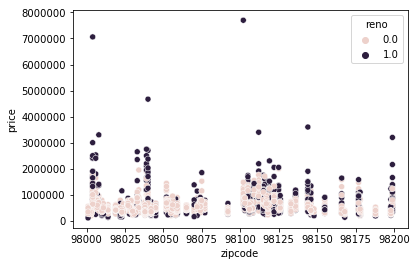

In [86]:
#sns.scatterplot(data=compar,x=df['zipcode'], y=df['price'],hue=compar['reno'] );

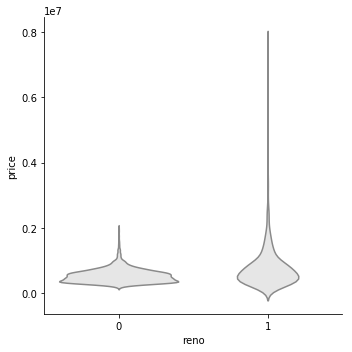

In [87]:
#sns.catplot(data=compar, x="reno", y="price", kind="violin", color=".9", inner=None)
#sns.swarmplot(data=compar, x="reno", y="price", size=3)

## Think of how to improve this

At this point to be able to add this information in our linear regression we are going to transform the information about renovation in a binary variable in our originial DataFrame.

In [88]:
df['reno']=0

In [89]:
df.loc[df['yr_renovated']!=0, 'reno']='1'

In [90]:
df['reno'].value_counts()

0    20852
1      744
Name: reno, dtype: int64

At this point I can drop the 'yr_renovated' column and add this new column to the one hot encoding DataFrame and run the model again, with the renovation information.

In [91]:
ohe_df['reno']=df['reno']
ohe_df.drop('yr_renovated', axis=1, inplace=True)

In [92]:
ohe_df.dropna(inplace=True)

In [93]:
y=ohe_df['price']
X=ohe_df.drop(['price','date'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [94]:
R2= metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.BLUE} The R squared value for this model done after One-Hot-Encoding and including the renovation factor is {Style.RESET_ALL}", R2.round(5)) 

 The R squared value for this model done after One-Hot-Encoding and including the renovation factor is  0.68489


Slightly better than before, but let's see what else we can do.

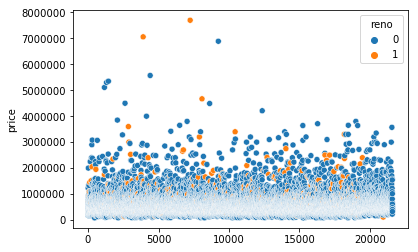

In [95]:
sns.scatterplot(data=df,x=df.index, y=df['price'], hue=df['reno']);

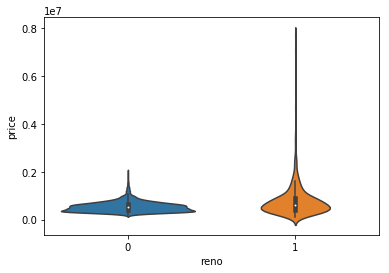

In [96]:
sns.violinplot(data=compar, x="reno", y="price")

In [97]:
#sns.swarmplot(data=compar, x="reno", y="price")

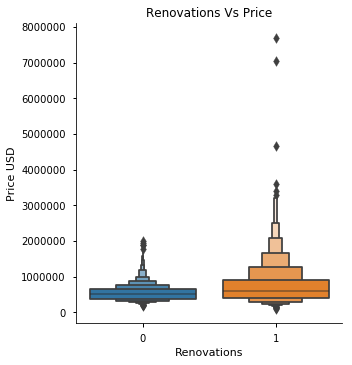

In [193]:
ax=sns.catplot(data=compar, x="reno", y="price", kind="boxen")
ax.set(ylabel="Price USD",
       xlabel="Renovations", title='Renovations Vs Price');

### Zipcodes <a id='Zip'></a>

Another feature that we might want to consider and include more seriously in our model is the zipcode of the house, since it gives us an indication of the area and also since it does not really make sense to be interpreted as a numerical value, unless it is treated with one hot encoding.

In [99]:
norm_df

,price,sqft_lot,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,sqft_living_log,sqft_above_log,sqft_living15_log
0,221900.0,5650,3,7.0,0.0,1955,0.0,98178,47.5112,-122.257,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.125551,-0.753616,-1.035481
1,538000.0,7242,3,7.0,400.0,1951,1991.0,98125,47.7210,-122.319,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.709415,0.672646,-0.326831
3,604000.0,5000,5,7.0,910.0,1965,0.0,98136,47.5208,-122.393,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.070655,-1.026886,-0.990239
4,510000.0,8080,3,8.0,0.0,1987,0.0,98074,47.6168,-122.045,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.292737,0.073466,-0.134267
5,1230000.0,101930,3,11.0,1530.0,2001,0.0,98053,47.6561,-122.005,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.468469,2.039137,2.835385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1131,3,8.0,0.0,2009,0.0,98103,47.6993,-122.346,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.513213,-0.145493,-0.630559
21593,400000.0,5813,3,8.0,0.0,2014,0.0,98146,47.5107,-122.362,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.457980,0.819016,-0.083791
21594,402101.0,1350,3,7.0,0.0,2009,0.0,98144,47.5944,-122.299,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.469050,-1.094750,-1.868748
21595,400000.0,2388,3,8.0,0.0,2004,0.0,98027,47.5345,-122.069,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.407754,-0.040759,-0.879984


In [100]:
# Categorical columns
cat_columns = ['zipcode']

# Fit encoder on training set
ohe.fit(df[cat_columns])

# Get new column names
new_cat_columns = ohe.get_feature_names(input_features=cat_columns)

# Transform training set
df_zipcode = pd.DataFrame(ohe.fit_transform(df[cat_columns]),
                           columns=new_cat_columns, index=df.index)

# Replace training columns with transformed versions
normzip_df = pd.concat([norm_df.drop(cat_columns, axis=1), df_zipcode], axis=1)
normzip_df.dropna(inplace=True)
normzip_df

,price,sqft_lot,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,5650.0,3.0,7.0,0.0,1955.0,0.0,47.5112,-122.257,5650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,7242.0,3.0,7.0,400.0,1951.0,1991.0,47.7210,-122.319,7639.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,5000.0,5.0,7.0,910.0,1965.0,0.0,47.5208,-122.393,5000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,8080.0,3.0,8.0,0.0,1987.0,0.0,47.6168,-122.045,7503.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1230000.0,101930.0,3.0,11.0,1530.0,2001.0,0.0,47.6561,-122.005,101930.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1131.0,3.0,8.0,0.0,2009.0,0.0,47.6993,-122.346,1509.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,400000.0,5813.0,3.0,8.0,0.0,2014.0,0.0,47.5107,-122.362,7200.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,402101.0,1350.0,3.0,7.0,0.0,2009.0,0.0,47.5944,-122.299,2007.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,400000.0,2388.0,3.0,8.0,0.0,2004.0,0.0,47.5345,-122.069,1287.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
normzip_df.isna().sum()

price            0
sqft_lot         0
condition        0
grade            0
sqft_basement    0
                ..
zipcode_98177    0
zipcode_98178    0
zipcode_98188    0
zipcode_98198    0
zipcode_98199    0
Length: 109, dtype: int64

In [102]:
y=normzip_df['price']
X=normzip_df.drop(['price'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [103]:
R2= metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.BLUE} The R squared value for this model done after One-Hot-Encoding and including the renovation factor is {Style.RESET_ALL}", R2.round(5)) 

 The R squared value for this model done after One-Hot-Encoding and including the renovation factor is  0.76225


WOW!!! Super nice increase in the R squared value. Hippy. good job to me

Let us explore a little bit more this concept of the zipcode, which is ultimately hinting at the fact that the location of the house is a heavy factor on the price.
I am going to group the data I have dividing it by zipcode and create some plots to visually explore the correlation

In [104]:
zipcode_df=df.groupby('zipcode').mean()
zipcode_df.sort_values(by='price', ascending=True, inplace=True)

In [105]:
zipcode_df.reset_index(inplace=True)
zipcode_df

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98002,2.342840e+05,3.326633,1.854271,1627.743719,7517.633166,1.334171,3.743719,6.693467,1522.537688,105.206030,1967.773869,49.924623,47.308780,-122.213357,1479.030151,7585.482412
1,98168,2.403284e+05,2.996283,1.486989,1468.624535,11269.843866,1.159851,3.245353,6.509294,1234.089219,229.182156,1952.721190,44.330855,47.489700,-122.307877,1471.680297,9744.022305
2,98032,2.512962e+05,3.392000,1.736000,1738.048000,10379.760000,1.220000,3.632000,7.144000,1434.320000,303.728000,1965.464000,31.984000,47.373556,-122.278848,1668.632000,9271.928000
3,98001,2.811949e+05,3.393352,1.919668,1903.783934,14967.002770,1.430748,3.335180,7.296399,1723.756233,180.027701,1980.867036,22.058172,47.309106,-122.270704,1830.099723,11218.875346
4,98148,2.849086e+05,3.140351,1.824561,1610.526316,8960.719298,1.210526,3.070175,6.947368,1486.491228,115.263158,1963.263158,34.596491,47.437437,-122.329316,1611.228070,8812.385965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,98102,8.996077e+05,3.250000,2.240385,2151.048077,3605.153846,1.990385,3.375000,8.298077,1752.442308,384.375000,1952.163462,76.576923,47.634591,-122.322250,1954.471154,3303.500000
66,98112,1.096239e+06,3.509294,2.364312,2498.743494,4990.431227,1.806691,3.516729,8.442379,2005.695167,485.873606,1944.449814,156.107807,47.629619,-122.297866,2280.078067,4898.159851
67,98040,1.194874e+06,4.028369,2.677305,3106.833333,13704.464539,1.505319,3.787234,8.960993,2474.329787,623.141844,1971.471631,205.336879,47.559846,-122.225592,2898.744681,12801.283688
68,98004,1.356524e+06,3.854890,2.542587,2909.022082,13104.220820,1.432177,3.495268,8.687697,2419.842271,489.179811,1971.470032,176.671924,47.616183,-122.205189,2674.700315,12805.022082


In [106]:
cheapest=(zipcode_df.iloc[0]['price']).round()
priciest=(zipcode_df.iloc[-1]['price']).round()
priciest

2161300.0

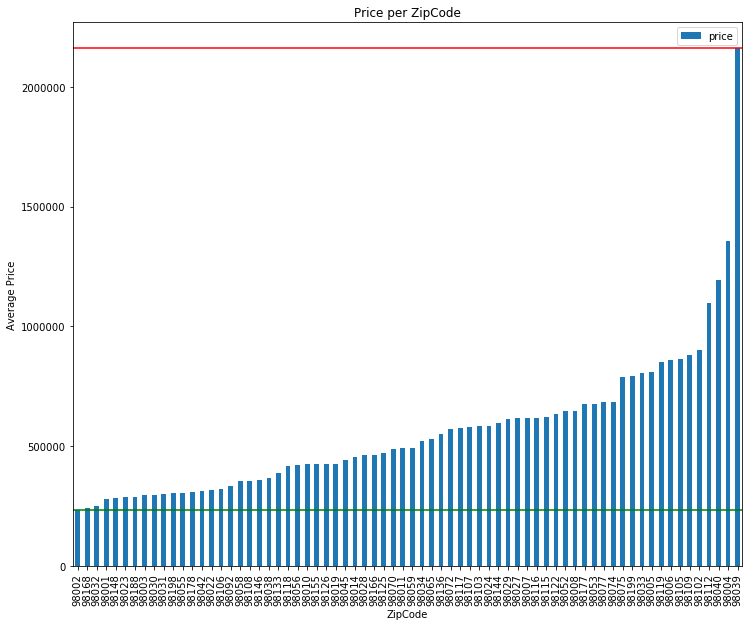

In [122]:
#fig, ax = plt.subplots(figsize=(12, 10))
#ax=sns.barplot(data=zipcode_df,x='zipcode', y='price'),#title='Price per ZipCode')#,\
#              xlabel='ZipCode', ylabel='Average Price')
ax.set_xticklabels(labels=zipcode_df['zipcode'], rotation=90)
zipcode_df.plot.bar(x='zipcode', y='price',title='Price per ZipCode',\
                    xlabel='ZipCode', ylabel='Average Price', figsize=(12, 10))
plt.axhline(y = cheapest, color = 'g', linestyle = '-') 
plt.axhline(y = priciest, color = 'r', linestyle = '-');
#plt.text(1,6 , f"cheapest ~ $ 230 K")#, transform=ax.transAxes)
#plt.text(-.18, .95, f"priciest ~ $ 2 mil")#, transform=ax.transAxes)
#plt.show()

Gotta add title
and make another one with the lines for highest and lowest avg price

### Seasons <a id='Seas'></a>

Another variable that we can categorize a little bit better is the date.
It is probably hard for the model to categorize based on all the different dates of the sales, but maybe there is a trend there that we can explore.
Therefore I am going to extract from the sale date the month, and categorize the sales based on their month to see if that also has an influence on the price of the houses.

In [169]:
#extracting month from the dates of the sales
from datetime import datetime
months=[]
for i in df['date']:
    dates=datetime.strptime(i, '%m/%d/%Y').date()
    mon=dates.month
    months.append(mon)

In [170]:
#creating a month column
df['months']=months
df

,level_0,index,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno,months
2181,2181,1580,4/13/2015,420000.0,4,2.0,2270,12000,1.0,4,...,910.0,1979,0.0,98072,47.7559,-122.148,2500,10120,0,4
1680,1680,21224,4/20/2015,525000.0,1,2.0,1030,5923,1.0,3,...,0.0,1940,0.0,98105,47.6653,-122.305,2650,5000,0,4
1681,1681,5483,4/1/2015,985000.0,3,2.0,1700,8534,1.0,4,...,0.0,1953,0.0,98004,47.6276,-122.205,2100,10443,0,4
1709,1709,3881,4/29/2015,248000.0,2,1.0,770,8600,1.0,4,...,0.0,1914,0.0,98027,47.5325,-122.031,1420,6960,0,4
1683,1683,2415,4/24/2015,699000.0,2,2.0,1400,4050,1.0,4,...,0.0,1954,0.0,98115,47.6768,-122.269,1900,5940,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20648,20648,8503,9/3/2014,415000.0,2,1.0,880,3200,1.0,3,...,0.0,1910,1970.0,98199,47.6575,-122.402,1880,6000,1,9
20649,20649,2184,9/18/2014,275000.0,4,1.0,1340,22500,1.5,3,...,0.0,1926,0.0,98168,47.4890,-122.316,1620,10800,0,9
20650,20650,2181,9/4/2014,150000.0,3,1.0,1450,6776,1.0,3,...,0.0,1952,0.0,98178,47.5056,-122.244,1680,7200,0,9
20623,20623,18434,9/2/2014,384950.0,3,1.0,1540,7740,1.0,4,...,0.0,1909,0.0,98126,47.5220,-122.375,1220,7740,0,9


Now we can see the trend of the sales price based on the months of the sale.

In [171]:
months_df=df.groupby('months').mean()
months_df.reset_index(inplace=True)
months_df.sort_values(by='months', ascending=True, inplace=True)
months_df

,months,level_0,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,7373.5,10729.385481,525963.251534,3.387526,2.078732,2085.094070,17869.721881,1.478528,3.347648,7.642127,1814.019427,266.565440,1971.749489,59.236196,98077.897751,47.553500,-122.212188,1975.859918,12687.026585
1,2,6261.0,10651.712911,508520.051323,3.347233,2.025662,2012.901363,13694.825180,1.466319,3.405774,7.558140,1727.935846,275.711307,1971.418605,46.383320,98076.716119,47.546850,-122.216140,1944.269447,11595.312751
2,3,13188.0,10873.474133,544057.683200,3.367467,2.009600,2021.968533,15604.088533,1.464267,3.355733,7.588267,1740.604800,276.718400,1970.597333,72.303467,98077.578667,47.553377,-122.214041,1951.490133,12678.426133
3,4,1114.0,10823.727681,562215.615074,3.367878,2.044415,2060.743831,14273.263795,1.495065,3.358905,7.651413,1777.883804,277.341857,1971.731270,54.629430,98078.967250,47.560614,-122.213484,1986.577389,12653.579632
4,5,15332.5,10791.506214,550849.746893,3.363712,2.058409,2090.514913,16678.293289,1.486123,3.420464,7.674399,1780.695940,303.951533,1970.216653,86.093206,98079.094863,47.565075,-122.214854,1990.449876,13694.719553
5,6,11162.0,10701.429031,557496.437758,3.407901,2.106569,2131.398714,14261.936151,1.512402,3.459807,7.737253,1820.781810,304.562701,1970.734497,65.930638,98079.585668,47.565457,-122.214369,2034.151125,12839.631144
6,7,8968.0,10804.707825,544892.161013,3.391678,2.080054,2128.246495,13857.654907,1.522162,3.442786,7.716870,1841.531886,278.256897,1971.777024,73.199005,98074.758933,47.560198,-122.206664,2029.130710,12584.116689
7,8,3198.0,11052.773595,536655.212481,3.357401,2.054667,2085.100567,14643.078391,1.499484,3.440433,7.685921,1798.394533,279.733368,1972.044353,65.887571,98077.033522,47.564750,-122.209769,1995.968025,12966.646209
8,9,20710.0,10521.216827,529723.517787,3.365330,2.071711,2079.319593,15365.775833,1.491248,3.431959,7.644833,1786.968379,284.214568,1970.534161,85.687747,98078.513834,47.560654,-122.213067,1983.068888,11887.396951
9,10,18886.5,11047.020256,539439.447228,3.364072,2.075693,2085.705224,15389.313433,1.503465,3.412047,7.643923,1788.792111,293.037846,1970.111407,73.312900,98078.598081,47.562249,-122.217264,1981.493070,12880.621002


In [172]:
import calendar
""" I can apply this to turn the months from numbers into abbreviations on the 
month names which is better for the graph. """
months_df['months'] = months_df['months'].apply(lambda x: calendar.month_abbr[x])

In [173]:
months_df

,months,level_0,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,Jan,7373.5,10729.385481,525963.251534,3.387526,2.078732,2085.094070,17869.721881,1.478528,3.347648,7.642127,1814.019427,266.565440,1971.749489,59.236196,98077.897751,47.553500,-122.212188,1975.859918,12687.026585
1,Feb,6261.0,10651.712911,508520.051323,3.347233,2.025662,2012.901363,13694.825180,1.466319,3.405774,7.558140,1727.935846,275.711307,1971.418605,46.383320,98076.716119,47.546850,-122.216140,1944.269447,11595.312751
2,Mar,13188.0,10873.474133,544057.683200,3.367467,2.009600,2021.968533,15604.088533,1.464267,3.355733,7.588267,1740.604800,276.718400,1970.597333,72.303467,98077.578667,47.553377,-122.214041,1951.490133,12678.426133
3,Apr,1114.0,10823.727681,562215.615074,3.367878,2.044415,2060.743831,14273.263795,1.495065,3.358905,7.651413,1777.883804,277.341857,1971.731270,54.629430,98078.967250,47.560614,-122.213484,1986.577389,12653.579632
4,May,15332.5,10791.506214,550849.746893,3.363712,2.058409,2090.514913,16678.293289,1.486123,3.420464,7.674399,1780.695940,303.951533,1970.216653,86.093206,98079.094863,47.565075,-122.214854,1990.449876,13694.719553
5,Jun,11162.0,10701.429031,557496.437758,3.407901,2.106569,2131.398714,14261.936151,1.512402,3.459807,7.737253,1820.781810,304.562701,1970.734497,65.930638,98079.585668,47.565457,-122.214369,2034.151125,12839.631144
6,Jul,8968.0,10804.707825,544892.161013,3.391678,2.080054,2128.246495,13857.654907,1.522162,3.442786,7.716870,1841.531886,278.256897,1971.777024,73.199005,98074.758933,47.560198,-122.206664,2029.130710,12584.116689
7,Aug,3198.0,11052.773595,536655.212481,3.357401,2.054667,2085.100567,14643.078391,1.499484,3.440433,7.685921,1798.394533,279.733368,1972.044353,65.887571,98077.033522,47.564750,-122.209769,1995.968025,12966.646209
8,Sep,20710.0,10521.216827,529723.517787,3.365330,2.071711,2079.319593,15365.775833,1.491248,3.431959,7.644833,1786.968379,284.214568,1970.534161,85.687747,98078.513834,47.560654,-122.213067,1983.068888,11887.396951
9,Oct,18886.5,11047.020256,539439.447228,3.364072,2.075693,2085.705224,15389.313433,1.503465,3.412047,7.643923,1788.792111,293.037846,1970.111407,73.312900,98078.598081,47.562249,-122.217264,1981.493070,12880.621002


In [174]:
#fig, ax = plt.subplots(figsize=(10, 8))
#ax=sns.barplot(data=months_df,x='months', y='price')#,order=months_df.sort_values('months') )
#ax.set_xticklabels(labels=months_df['months'], rotation=90)

#plt.show()

In [175]:
df.reset_index(inplace=True)
df.sort_values(by='months', ascending=True, inplace=True)
df['months'] = df['months'].apply(lambda x: calendar.month_abbr[x])

ValueError: cannot insert level_0, already exists

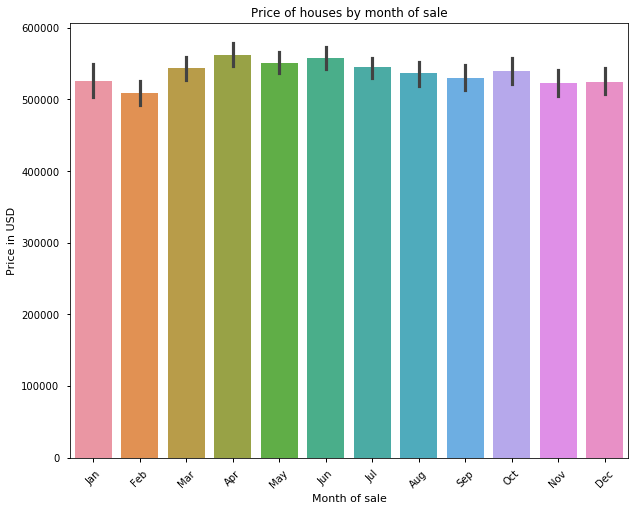

In [176]:
fig, ax = plt.subplots(figsize=(10, 8))
ax=sns.barplot(data=df,x='months', y='price')
ax.set_xticklabels(labels=months_df['months'], rotation=45)
ax.set_title('Price of houses by month of sale')
ax.set_xlabel('Month of sale')
ax.set_ylabel('Price in USD')
plt.show()

Now I am going to do a one hot encoding based on the months, since we saw it is a very effective way to include categorical values to the model.

In [177]:
origin_series = pd.Series(df['months'])
cat_origin = origin_series.astype('category')
monthsohe_df=pd.get_dummies(cat_origin)
#months_df.rename(columns={'1': 'January', '2': 'February', '3':'March', '4':'April', '5':'May', '6':'June','7':'July',\
#                       '8':'August', '9':'September', '10':'October', '11':'November', '12':'December'}, inplace=True)

Now I can merge the two data frames to run one more linear regression model

In [178]:
# Putting the two dataframes together, so we have normalized, zipcodes and seasons
nzs_df = pd.concat([normzip_df, monthsohe_df], axis=1)
nzs_df.dropna(inplace=True)
nzs_df.head()

,price,sqft_lot,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,...,3,4,5,6,7,8,9,10,11,12
0,221900.0,5650.0,3.0,7.0,0.0,1955.0,0.0,47.5112,-122.257,5650.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,7242.0,3.0,7.0,400.0,1951.0,1991.0,47.7210,-122.319,7639.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,5000.0,5.0,7.0,910.0,1965.0,0.0,47.5208,-122.393,5000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,8080.0,3.0,8.0,0.0,1987.0,0.0,47.6168,-122.045,7503.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1230000.0,101930.0,3.0,11.0,1530.0,2001.0,0.0,47.6561,-122.005,101930.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
y=nzs_df['price']
X=nzs_df.drop(['price'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [130]:
R2= metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.BLUE} The R squared value for this model done after One-Hot-Encoding the months is {Style.RESET_ALL}", R2.round(5)) 

 The R squared value for this model done after One-Hot-Encoding the months is  0.76387


Even better!!
Now on this finalized model we are going to perform a cross validation and run more serious statistics.

## Cross Validation

We are going to perform a train-test split and we are going to reperform on the train the transformations that we saw were more efficient.
We will use the normal scaler, and one hot encoding for bedrooms, bathrooms, floors, zipcode, months of sale and renovations.

In [ ]:
from sklearn.model_selection import cross_validate
# So let us define one more time X and y like we did in our last - best performing model
y=nzs_df['price']
X=nzs_df.drop(['price'], axis=1)

results=cross_validate(linreg, X, y, cv=10, return_train_score=True, scoring=["r2", "neg_mean_squared_error"])

In [ ]:
results

In [ ]:
test_R2=results['test_r2'].mean()
train_R2=results['train_r2'].mean()
test_MSRE=np.sqrt(-results['test_neg_mean_squared_error'].mean())
train_MSRE=np.sqrt(-results['train_neg_mean_squared_error'].mean())
print(" train MSRE:",train_MSRE, "\n test MSRE:", train_MSRE)
print(" train R2:",train_R2, "\n test R2:", test_R2)

In [ ]:

#cross_val_results = cross_validate(linreg, X, y, scoring="neg_mean_squared_error", return_train_score=True, cv=10)
# Negative signs in front to convert back to MSE from -MSE
#train_avg = -cross_val_results["train_score"].mean()
#test_avg = -cross_val_results["test_score"].mean()
#print("train MSE:",train_avg, "\n test MSE:", test_avg)

In [ ]:
#cross_val_results = cross_validate(linreg, X, y, scoring="r2", return_train_score=True, cv=10)
#train_avg = cross_val_results["train_score"].mean()
#test_avg = cross_val_results["test_score"].mean()
#print("train R2:",train_avg, "\n test R2:", test_avg)

As we can see the MSRE is pretty high, but not too bad considering that the unit is in dollars like price, so it means that when we are trying to make a prediction on price of the house we coudl be off of about $179200.
On the other hand the R2 results are pretty good and the test permormed almost as well as the train, which tells us that we are not overfitting.

To have a concrete proof that all of our work on the data has been useful I am going to run a model with the raw data, just afer one hot encoding to be able to compare the two and see the fruit of our work.

In [ ]:
y=ohe_df['price']
X=ohe_df.drop(['price','date',], axis=1)

results_raw=cross_validate(linreg, X, y, cv=10, return_train_score=True, \
                           scoring=["r2", "neg_mean_squared_error"])

In [ ]:
test_R2=results_raw['test_r2'].mean()
train_R2=results_raw['train_r2'].mean()
test_MSRE=np.sqrt(-results_raw['test_neg_mean_squared_error'].mean())
train_MSRE=np.sqrt(-results_raw['train_neg_mean_squared_error'].mean())
print("Raw Data train MSRE :",train_MSRE, "\n test MSRE:", train_MSRE)
print("Raw Data train R2:",train_R2, "\n test R2:", test_R2)

With all our manipulations on the data we were able to increase R2 by almost 10%, and brought down the MSRE of about 25 thousand dollars!
Then I need to add visuals to all this.

Let us take a look at our finalized model to see the coefficients that turned out to be the most influential.

In [ ]:
y=nzs_df['price']
y=list(y)
X=nzs_df.drop(['price'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()


In [ ]:
coefficients=model.params
sort_coef=coefficients.sort_values(ascending=False)
sort_coef[0:10]

This is not showing me bedrooms or bathrooms because they are all split up because of the one hot encoding.

I went back up and did it on the very first model before one hot encoding. Not great. Got 

lat              550309.302063
grade            103112.329822
bathrooms         47409.251943
condition         25888.462328
floors            12649.307510
sqft_living         125.879803
sqft_above           61.219132
sqft_basement        54.866329
sqft_living15        38.069783
sqft_lot              0.151083

In [ ]:
#y=df['price'] this doesnt work. I did too many modifications to df but I went back up 2doit
#y=list(y)
#X=df.drop(['price', 'date'], axis=1)
#X = sm.add_constant(X)
#model = sm.OLS(y, X).fit()
#model.summary()

If I want to do it with the Train-Test split instead of Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
y=nzs_df['price']
X=nzs_df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
train_msre=np.sqrt(train_mse)
test_msre=np.sqrt(test_mse)
print('Train Root Mean Squared Error:', train_msre)
print('Test Root Mean Squared Error:', test_msre)

In [ ]:
# Create a matplotlib figure for Model vs Test Data
plt.figure(figsize=(8, 5))
# Create a scatter plot
plt.scatter(y_test, y_hat_test, label='Model')
plt.plot(y_train, y_train, label='Actual data', color='c')
plt.title('Model vs Test Data')
plt.legend()

# Polynomial Regression <a id='Poly'></a>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3) # degree is the highest exponent in the poly
#interaction_only: defalut false, if true I wont get a^2 and b^2 but only ab
y=df['price']
X=df.drop(['price', 'date', ], axis=1)

# Fitting the PolynomialFeatures object
pf.fit(X)

In [ ]:
pdf = pd.DataFrame(pf.transform(X), columns=pf.get_feature_names())# it also
#stores the names of the features, it shows me how they are constructed
pdf

In [ ]:
print(pdf.shape)

In [ ]:
print(y.shape)

In [ ]:
lr = LinearRegression()

lr.fit(pdf, y)

In [ ]:
lr.score(pdf, y) 

This is a very good R squared, but what usually happens with the polynomial regression is that we are fitting the model on the train set so well, that we are actually overfitting and it will perform very poorly on the test set, because we are picking up not only the actual real trends of the relationship between the variables, but also some random noise, given by the random data.
Let us see this in practice.

Train test split with poly to show the overfitting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pdf, y,
                                                    test_size=0.2,
                                                    random_state=42)
lr_poly = LinearRegression()

# Always fit on the training set
lr_poly.fit(X_train, y_train)

lr_poly.score(X_train, y_train)

In [ ]:
lr_poly.score(X_test, y_test)

The fact that R squared on the test is so bad shows us that we fitted very well the train, in fact too well picking up random noise. This model is not good becayse even if it can explain very well the train it cannot generalize to a randomly chosen test set.

## Using Polynomial factors to choose new variables

Usually one thing that is suggested to improve the model is trying to come up with new variables that can increase the correlations, by multiplying some of the independent variables we have.
But it is not necessary to try to multiply them at random, and the polinomial regression even though it usually leads to overfitting, in this case can be very useful.
We are going to run again the model with the polynomial regression, and we are going to look at the factors that perfmormed best (since the polynomial features contains also all the possible interactions between the variables, up until the power that I determined).
Then we are going to take only the terms that performed best, that have a higher coefficient, and make a model again fitting with just those, adding them to our best perfmorming model so far.

In [ ]:
y=df['price']
y = list(y)

model = sm.OLS(y, pdf).fit()
model.summary()

In [ ]:
coefficients=model.params
sort_coef=coefficients.sort_values(ascending=False)
sort_coef[0:5]

We need to do a little interpretation here, looking at the name of the columns.
Let us quickly create a dataframe to help us read into the x values

In [ ]:
df.columns

In [ ]:
cols=df.drop(['price', 'date', ], axis=1).columns
xlist=['x%d' % i for i in range(0, 18, 1)]
interp=pd.DataFrame(data=zip(cols,xlist),columns=['coe','xvalues'])
interp

Perfect, with this we can interpret what are the top 10 coefficients that have the most influence on the price of the houses and include them in our model.

In [ ]:
best_coefficients=['bedrms*zip','flrs^4*sqft_lv15','condition*zip', 'yr_built^2*lat',\
                   'bedrms*sqftbsmt*months']

A quick note: these coefficients don't need to make sense from a logical point of view, so we are transitioning from inferential statistic to predictive modeling where we our top priority is not understanding the parameters that determin a change in our target and describe the relationship best, but to have a model that can work as well as possible in predicting the price of a house, even if not all the coefficients are logical.
<br>Now let us create new columns with these features, and we will add them to the DataFrame and run the cross validation model again.

In [ ]:
df_newfeatures=pd.DataFrame()

In [ ]:
df_newfeatures['bedrms*zip']=df['bedrooms']*df['zipcode']
df_newfeatures['flrs^4*sqft_lv15']=(df['floors']**4)*df['sqft_living15']
df_newfeatures['condition*zip']=df['condition']*df['zipcode']
df_newfeatures['yr_built^2*lat']=(df['yr_built']**2)*df['lat']
df_newfeatures['bedrms*sqftbsmt*months']=df['bedrooms']*df['sqft_basement']*df['months']

In [ ]:
nzs_nf_df=pd.concat([nzs_df,df_newfeatures], axis=1)
nzs_nf_df.dropna(inplace=True)

In [ ]:
nzs_nf_df

Let us try again to run our cross validation

In [ ]:
y=nzs_nf_df['price']
X=nzs_nf_df.drop(['price'], axis=1)

results=cross_validate(linreg,X, y, cv=10, return_train_score=True, \
                       scoring=["r2", "neg_mean_squared_error"])

In [ ]:
test_R2=results['test_r2'].mean()
train_R2=results['train_r2'].mean()
test_MSRE=np.sqrt(-results['test_neg_mean_squared_error'].mean())
train_MSRE=np.sqrt(-results['train_neg_mean_squared_error'].mean())
print(" train MSRE:",train_MSRE, "\n test MSRE:", train_MSRE)
print(" train R2:",train_R2, "\n test R2:", test_R2)

We are still overfitting.
Let us try to use only 3 new features.

In [ ]:
df_3features=df_newfeatures.drop(['yr_built^2*lat','bedrms*sqftbsmt*months'], axis=1)
nzs_3f_df=pd.concat([nzs_df,df_3features], axis=1)
nzs_3f_df.dropna(inplace=True)

In [ ]:
y=nzs_3f_df['price']
X=nzs_3f_df.drop(['price'], axis=1)

results=cross_validate(linreg,X, y, cv=10, return_train_score=True, \
                       scoring=["r2", "neg_mean_squared_error"])

In [ ]:
test_R2=results['test_r2'].mean()
train_R2=results['train_r2'].mean()
test_MSRE=np.sqrt(-results['test_neg_mean_squared_error'].mean())
train_MSRE=np.sqrt(-results['train_neg_mean_squared_error'].mean())
print(" train MSRE:",train_MSRE, "\n test MSRE:", train_MSRE)
print(" train R2:",train_R2, "\n test R2:", test_R2)

Better but still overfitting.
Poly second degree?

## Poly Second Degree

In [ ]:
pf = PolynomialFeatures(degree=2) # degree is the highest exponent in the poly
#interaction_only: defalut false, if true I wont get a^2 and b^2 but only ab
y=df['price']
X=df.drop(['price', 'date', ], axis=1)

# Fitting the PolynomialFeatures object
pf.fit(X)

In [ ]:
pdf2 = pd.DataFrame(pf.transform(X), columns=pf.get_feature_names())# it also
#stores the names of the features, it shows me how they are constructed
pdf2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pdf2, y,
                                                    test_size=0.2,
                                                    random_state=19)
lr_poly = LinearRegression()

# Always fit on the training set
lr_poly.fit(X_train, y_train)

lr_poly.score(X_train, y_train)

In [ ]:
lr_poly.score(X_test, y_test)

### Choosing the best features

In [ ]:
y=df['price']
y = list(y)

model = sm.OLS(y, pdf2).fit()
model.summary()

In [ ]:
coefficients=model.params
sort_coef=coefficients.sort_values(ascending=False)
sort_coef[0:5]

In [ ]:
cols=df.drop(['price', 'date', ], axis=1).columns
xlist=['x%d' % i for i in range(0, 24, 1)]
interp=pd.DataFrame(data=zip(cols,xlist),columns=['coe','xvalues'])
interp

The three new parameters we are getting are the products or: longitude & renovations, latitude & renovations, bedrooms & renovations. Let us try to include those in our model.
It is clear that the renovation variable is one of the most infulential ones. Our result tells us that basically the number of bedrooms, and location of the house are the most infulential features. It is kind of silly to multiply by 'reno' at this point because it is just a zero or 1 depending on whether the house was renovated or not, but I will do it just to show how the method would work from beginning to end.

In [ ]:
df['reno'].value_counts()

In [ ]:
ply2_3feat=pd.DataFrame()
ply2_3feat['long*reno']=np.where(df['reno']==1,df['long']*1,df['long'])
ply2_3feat['lat*reno']=np.where(df['reno']==1,df['lat']*1,df['lat'])
ply2_3feat['bdrms*reno']=np.where(df['reno']==1,df['bedrooms']*1,df['bedrooms'])
ply2_3feat

In [ ]:
poly2_df=pd.concat([nzs_df,ply2_3feat], axis=1)
poly2_df.dropna(inplace=True)

In [ ]:
y=poly2_df['price']
X=poly2_df.drop(['price'], axis=1)

results=cross_validate(linreg,X, y, cv=10, return_train_score=True, \
                       scoring=["r2", "neg_mean_squared_error"])

In [ ]:
test_R2=results['test_r2'].mean()
train_R2=results['train_r2'].mean()
test_MSRE=np.sqrt(-results['test_neg_mean_squared_error'].mean())
train_MSRE=np.sqrt(-results['train_neg_mean_squared_error'].mean())
print(" train MSRE:",train_MSRE, "\n test MSRE:", train_MSRE)
print(" train R2:",train_R2, "\n test R2:", test_R2)

This time we are using the terms from a polynomial feature but without overfitting, as we can see from the R squared value that is still pretty high.
In our case the polynomial model with 2nd degree is still a better fit, but this can be a method to keep in mind if we want to select only some features that can improve our model without risking overfitting with a poly.

In [ ]:
#The fit works as usual:
reg_poly = LinearRegression().fit(X_fin, y)
#creating the steps to put in the fit and the graph
X_linspace = pd.DataFrame(np.linspace(50, 100, 50), columns=['Temp'])
#Temp is the x independent variable im plotting against yield
X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

In [ ]:
mean_squared_error(y, reg_poly.predict(X_fin))
r2_score(y, reg_poly.predict(X_fin))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34567)

# 2nd degree polynomial
poly_2 = PolynomialFeatures(2)  
reg_poly_2 = LinearRegression().fit(poly_2.fit_transform(X_train), y_train)

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)

axes[0].scatter(X_train, y_train, color='green', label="data points")
axes[0].plot(X_linspace, reg_poly_2.predict(poly_2.transform(X_linspace)), label="best fit line")
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Yield')
axes[0].set_title('Train')

axes[1].scatter(X_test, y_test, color='green')
axes[1].plot(X_linspace, reg_poly_2.predict(poly_2.transform(X_linspace)))
axes[1].set_xlabel('Temperature')
axes[1].set_title('Test')

fig.legend()
fig.suptitle('2nd Degree Polynomial');

## Algorythm price of the house - maybe no, see how Eva did it

In [ ]:
y=nzs_df['price']
X=nzs_df.drop(['price'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

Better with feature selector.

## Algorythm what can I afford

# Recommendations:
1) Buy a house for a lower budget and then improve it
2) study the areas which have houses in your same price range
3) try to buy during low season
4) bathrooms are the most valuable thing, try to buy and add a bathroom later on

## A few Ideas
* putting back bedrooms and bathrooms
* dividing the date of sale by season
* changing renovations into 1 or 0 
* one hot encoding the zipcode

But first let me do my linear regression with just the variables that I thought were most essential.

It's clear. The more I keep there the better the R squared.
So Morgan is right it's not about removing anymore but actually about adding more variables.
So here we go!
Let's do stuff about location and renovations and date sold.
Let me just double check the last thing if he is right about one hot encoding bedrooms and bathrooms or no.

In [ ]:
#Yeah no. One hot encoding the bedrooms and bathrooms is actually better. I bet floors don't even matter that much.